# 💽 Imports

---

In [69]:
# MAIN
import os
from math import pi
import ast

# DATA MANIPULATION
## Numpy
import numpy as np
## Pandas
import pandas as pd

# DATA VISUALIZATION
## Scipy
import scipy as sp
from scipy.cluster import hierarchy

## Plotly
import plotly as py
import plotly.graph_objs as go

## Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import subplots
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

In [70]:
import sys
# Caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../src/addons')

from etlAiAdoption import extractTransformLoad # type: ignore

# 🗃️ Load files

---

In [71]:
# Construct the path to the CSV file relative to the current notebook
current_file_path = os.path.abspath("main.ipynb")
current_dir = os.path.dirname(current_file_path)

extractTransformLoad(current_file_path)
# file is in a folder named 'data' in the same folder as the notebook
ai_adoption_survey_src_path = os.path.join(current_dir, "data", "cl_ai_adoption_2024.csv")

df_survey = pd.read_csv(
  ai_adoption_survey_src_path,
  delimiter=',',
  header=0,
  index_col=False
)

df_survey['Tools'] = df_survey['Tools'].apply(ast.literal_eval)
df_survey['Motivations'] = df_survey['Motivations'].apply(ast.literal_eval)


remap of industry sector: 26 to 15
remap of company department: 42 to 19
Data saved to: c:\Users\109768706\Git\paris1-iae-ai_adoption_by_employees\src\data\cl_ai_adoption_2024.csv


In [72]:
stackoverflow_2023_survey_src_path = os.path.join(current_dir, "data", "raw", "stackoverflow_2023.csv")

df_stack_2023_survey = pd.read_csv(
  stackoverflow_2023_survey_src_path,
  delimiter=',',
  header=0,
  index_col=False,
)


# ResponseId
# Q120
# MainBranch
# Age
# Employment
# RemoteWork
# CodingActivities
# EdLevel
# LearnCode
# LearnCodeOnline
# LearnCodeCoursesCert
# YearsCode
# YearsCodePro
# DevType
# OrgSize
# PurchaseInfluence
# TechList
# BuyNewTool
# Country
# Currency
# CompTotal
# LanguageHaveWorkedWith
# LanguageWantToWorkWith
# DatabaseHaveWorkedWith
# DatabaseWantToWorkWith
# PlatformHaveWorkedWith
# PlatformWantToWorkWith
# WebframeHaveWorkedWith
# WebframeWantToWorkWith
# MiscTechHaveWorkedWith
# MiscTechWantToWorkWith
# ToolsTechHaveWorkedWith
# ToolsTechWantToWorkWith
# NEWCollabToolsHaveWorkedWith
# NEWCollabToolsWantToWorkWith
# OpSysPersonal use
# OpSysProfessional use
# OfficeStackAsyncHaveWorkedWith
# OfficeStackAsyncWantToWorkWith
# OfficeStackSyncHaveWorkedWith
# OfficeStackSyncWantToWorkWith
# AISearchHaveWorkedWith
# AISearchWantToWorkWith
# AIDevHaveWorkedWith
# AIDevWantToWorkWith
# NEWSOSites
# SOVisitFreq
# SOAccount
# SOPartFreq
# SOComm
# SOAI
# AISelect
# AISent
# AIAcc
# AIBen
# AIToolInterested in Using
# AIToolCurrently Using
# AIToolNot interested in Using
# AINextVery different
# AINextNeither different nor similar
# AINextSomewhat similar
# AINextVery similar
# AINextSomewhat different
# TBranch
# ICorPM
# WorkExp
# Knowledge_1
# Knowledge_2
# Knowledge_3
# Knowledge_4
# Knowledge_5
# Knowledge_6
# Knowledge_7
# Knowledge_8
# Frequency_1
# Frequency_2
# Frequency_3
# TimeSearching
# TimeAnswering
# ProfessionalTech
# Industry
# SurveyLength
# SurveyEase
# ConvertedCompYearly


In [73]:
#TODO Pas de négation dans les titres pour simplifier la lecture

# 📊 Data function

---

In [74]:
def plot_pie(column, title):
    # check if df_survey[column] is a set if it is we need to explose first
    df = pd.DataFrame()
    if isinstance(df_survey[column].dropna().iloc[0], set):
        df = df_survey.explode(column)
    else:
        df = df_survey.copy()
    # if % is less than 1% then it will be combined into 'Others'
    graph_df = df[column].value_counts(normalize=True)
    others_sum = graph_df[graph_df <= 0.01].sum()
    graph_df = graph_df[graph_df > 0.01]
    if others_sum > 0:
        graph_df['Others'] = others_sum

    graph_df = graph_df.sort_values(ascending=False)
    plt.figure(figsize=(16, 8))
    patches, texts, autotexts = plt.pie(graph_df, autopct=lambda p: '{:.1f}%'.format(p) if p >= 1 else '',
                                         startangle=0, counterclock=False)
    plt.legend(patches, graph_df.index, loc="upper right")
    plt.title(title)
    plt.xlabel('')
    plt.ylabel('')
    plt.show()

# 🗣️ Survey Answer

---

# ❓ Question 1: Quel est votre genre ?

- [x] 1/2 Répartition de l'age par genre
- [x] 1/3&4 Distribution des secteurs d'activité et service de l'entreprise par genre
- [ ] 1/10 RAS

---

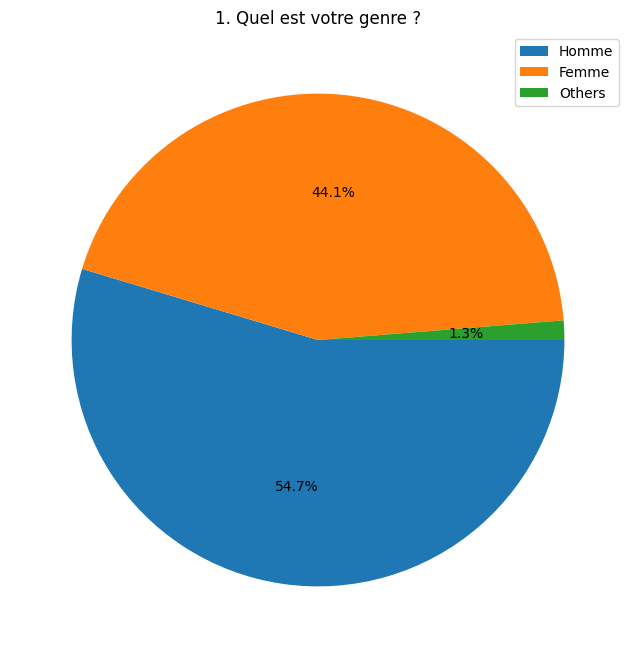

In [75]:
plot_pie('Gender', '1. Quel est votre genre ?')

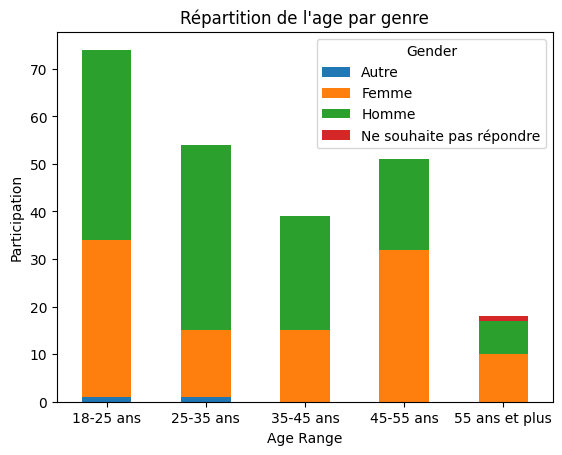

In [76]:
# 1/2 Age Distribution by Gender
age_gender = df_survey.groupby(['Age', 'Gender']).size().unstack()
age_gender.plot(kind='bar', stacked=True)
plt.title('Répartition de l\'age par genre')
plt.xlabel('Age Range')
plt.ylabel('Participation')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

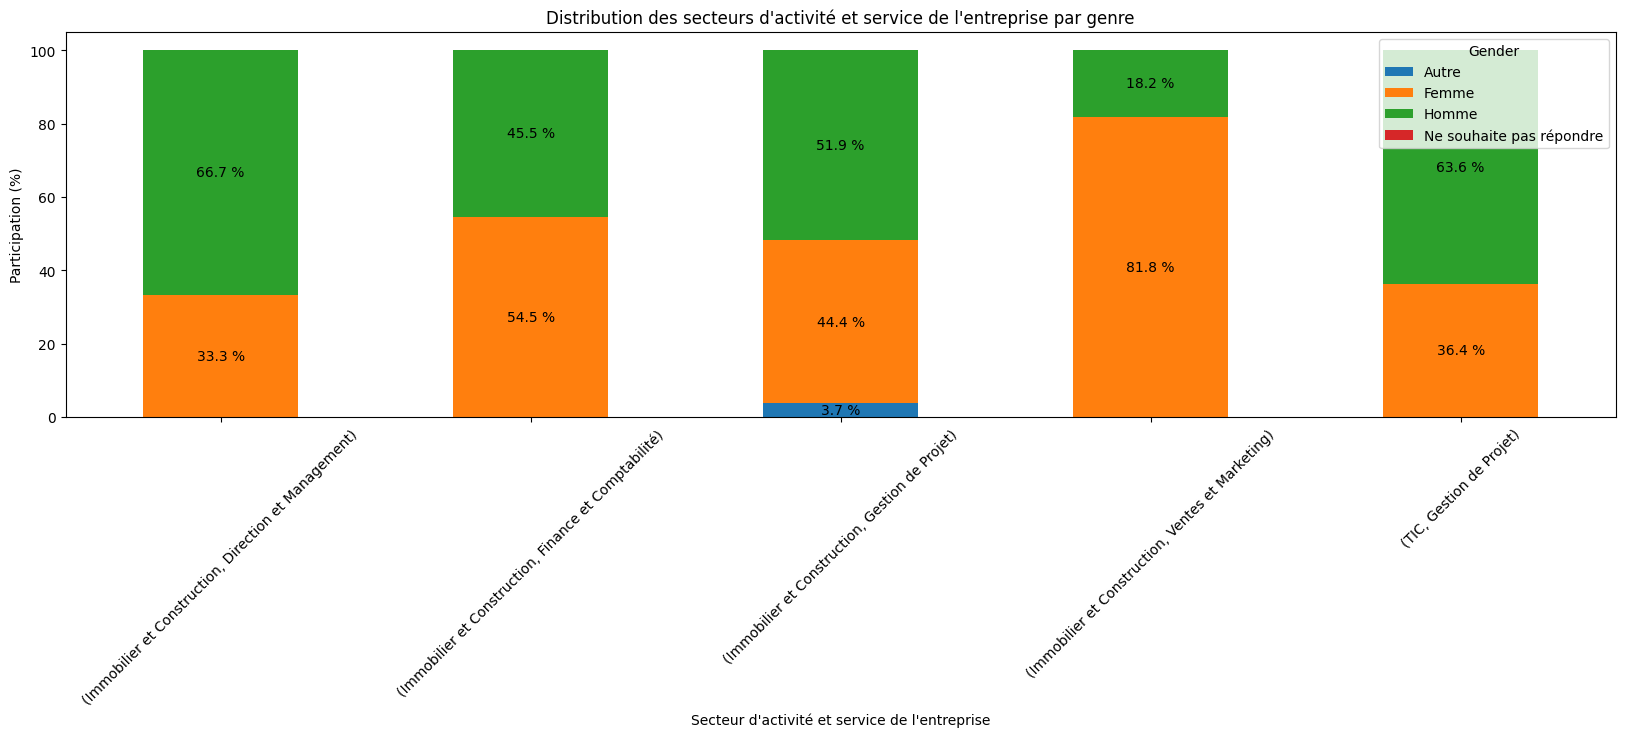

In [77]:
# 1/3&4 Sector and Departement by Gender
gender_distribution = df_survey.groupby(['Sector', 'Department', 'Gender']).size().unstack()
MIN_PARTICIPATION_FILTER = 10
total_count = gender_distribution.sum(axis=1)
valid_sectors_departments = total_count[total_count > MIN_PARTICIPATION_FILTER].index
gender_distribution_filtered = gender_distribution.loc[valid_sectors_departments]

# Calculate percentage
gender_distribution_percentage = gender_distribution_filtered.div(gender_distribution_filtered.sum(axis=1), axis=0) * 100

# Plot the data
ax = gender_distribution_percentage.plot(kind='bar', stacked=True, figsize=(20,5))
plt.title('Distribution des secteurs d\'activité et service de l\'entreprise par genre')
plt.xlabel('Secteur d\'activité et service de l\'entreprise')
plt.ylabel('Participation (%)')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Add percentage text on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:  # Only add text if percentage is greater than 0
        ax.text(x+width/2,
                y+height/2,
                '{:.1f} %'.format(height),
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

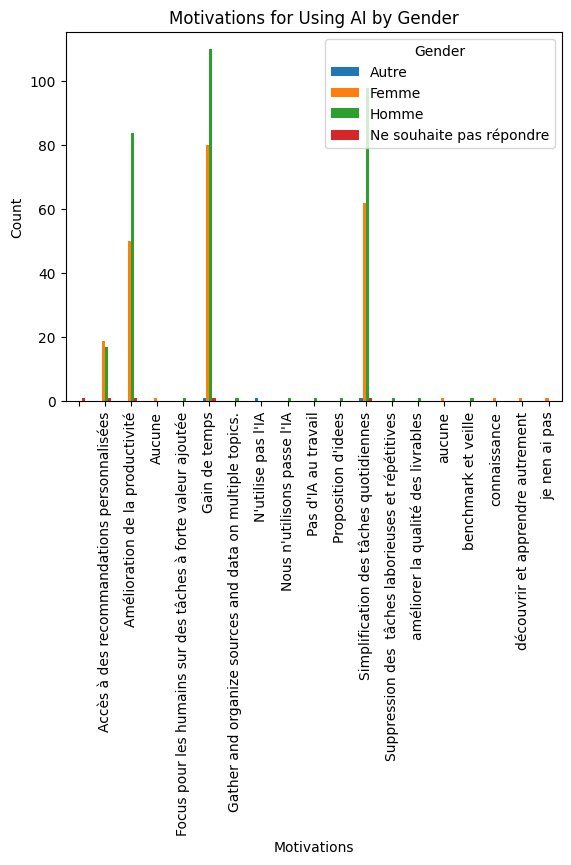

In [78]:
# 1/10 Motivations for Using AI by Gender
# Explode the sets into individual rows
df_explod_motivations = df_survey.explode('Motivations')

# Group by and unstack to create the plot
motivations_gender = df_explod_motivations.groupby(['Motivations', 'Gender']).size().unstack()
motivations_gender.plot(kind='bar')
plt.title('Motivations for Using AI by Gender')
plt.xlabel('Motivations')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# ❓ Question 2: Dans quelle tranche d’âge vous situez-vous ?

- [ ] 2/3&4 Répartition des secteurs d'activité et services par tranche d'âge
- [x] 2/5 Familiarité avec l'IA par tranche d'âge
- [ ] 2/6 Réfractarité à l’utilisation de l'IA au travail par tranche d'âge
- [x] 2/7 Ouverture à l'utilisation des outils utilisant l'IA par tranche d'âge
- [ ] 2/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par tranche d'âge
- [ ] 2/10 Motivations pour utiliser des outils basés sur l'IA par tranche d'âge
- [ ] 2/11 Problèmes rencontrés avec les outils basés sur l'IA par tranche d'âge
- [ ] 2/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par tranche d'âge
- [x] 2/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par tranche d'âge
- [x] 2/14 Perception de la perte d'autonomie due à l'IA par tranche d'âge
- [ ] 2/15 Perception de la réduction des capacités de réflexion due à l'IA par tranche d'âge
- [ ] 2/16 Crainte de perdre son emploi à cause de l'IA par tranche d'âge
- [ ] 2/17 Autres inquiétudes face à l'arrivée de l'IA par tranche d'âge
- [ ] 2/18 Inclusion dans le développement d'outils basés sur l'IA par tranche d'âge
- [ ] 2/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par tranche d'âge
- [x] 2/20 Inclination à utiliser l'IA après consultation par tranche d'âge
- [ ] 2/21 Disposition à suivre une formation sur les technologies basées sur l'IA par tranche d'âge
- [ ] 2/22 Commentaires et suggestions sur l'arrivée de l'IA par tranche d'âge

---

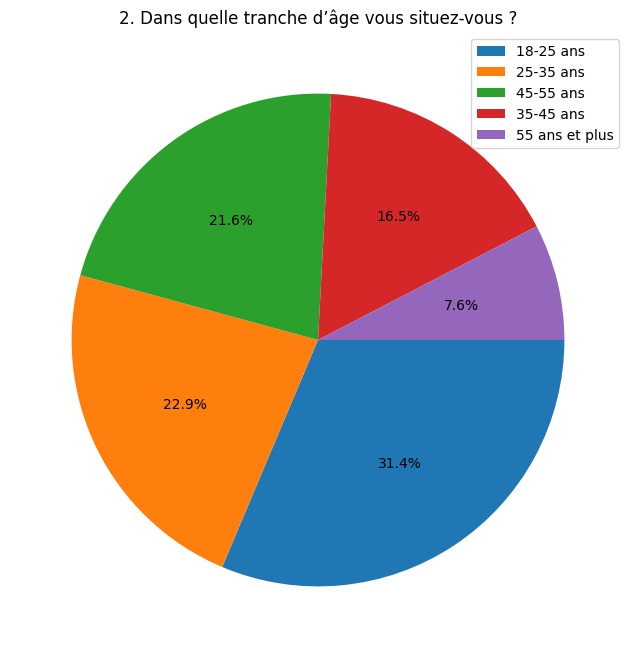

In [79]:
plot_pie('Age', '2. Dans quelle tranche d’âge vous situez-vous ?')

## 5. 📊 Familiarité avec IA / age

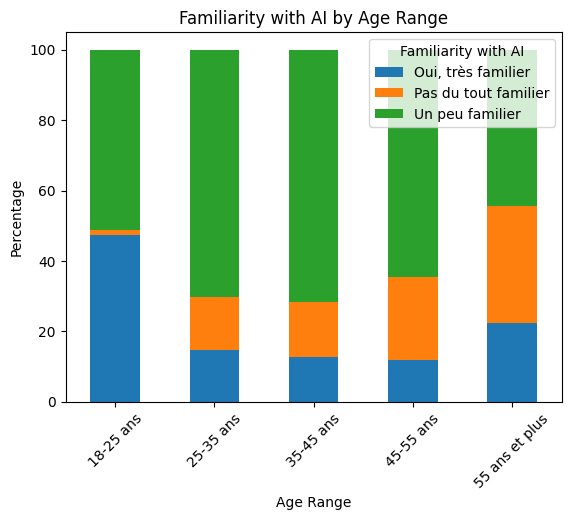

In [80]:
#TODO faire ca

# Define order of categories

# Convert Familiarity to a categorical type


# 2/5 Familiarity with AI by Age Range
familiarity_age = df_survey.groupby(['Age', 'Familiarity']).size().unstack()

# Convert counts to percentages
familiarity_age = familiarity_age.div(familiarity_age.sum(axis=1), axis=0) * 100

familiarity_age.plot(kind='bar', stacked=True)
plt.title('Familiarity with AI by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')
plt.show()

## ✅ 3. Réfractaire / age

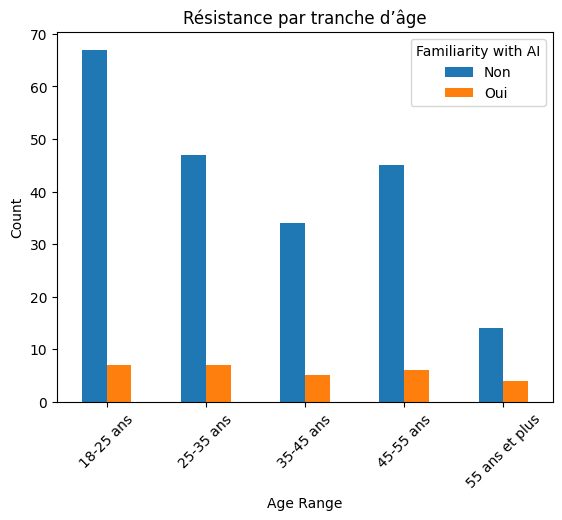

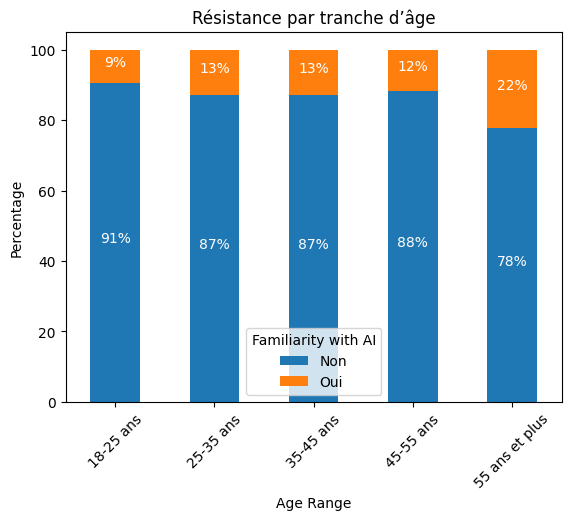

In [81]:
# 2/6 Réfractaire par tranche d'âge
familiarity_age_bar = df_survey.groupby(['Age', 'Resistance']).size().unstack()
familiarity_age_bar.plot(kind='bar')
plt.title('Résistance par tranche d’âge')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')
plt.show()

# Convert counts to percentages
familiarity_age_percentage = familiarity_age_bar.div(familiarity_age_bar.sum(axis=1), axis=0) * 100

# Plot the data
ax = familiarity_age_percentage.plot(kind='bar', stacked=True)
plt.title('Résistance par tranche d’âge')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')

# Add percentages on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0f}%', (x + width/2, y + height*0.5), ha='center', color='white')

plt.show()

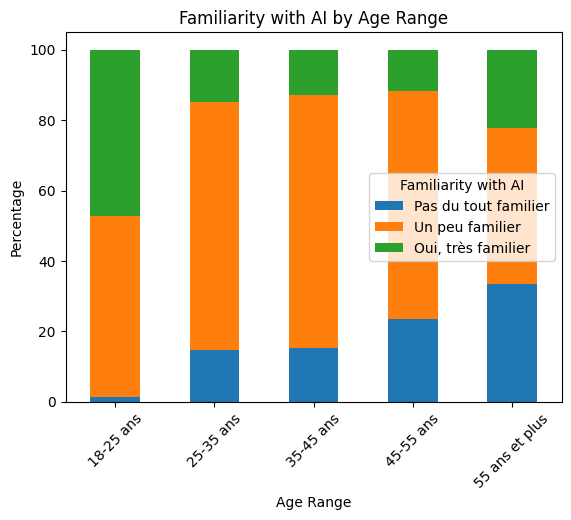

In [82]:
# 2/5 Familiarity with AI by Age Range
familiarity_age = df_survey.groupby(['Age', 'Familiarity']).size().unstack()

familiarity_order = ["Pas du tout familier", "Un peu familier", "Oui, très familier"]
familiarity_age = familiarity_age[familiarity_order]

# Convert counts to percentages
familiarity_age = familiarity_age.div(familiarity_age.sum(axis=1), axis=0) * 100

familiarity_age.plot(kind='bar', stacked=True)
plt.title('Familiarity with AI by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Familiarity with AI')
plt.show()

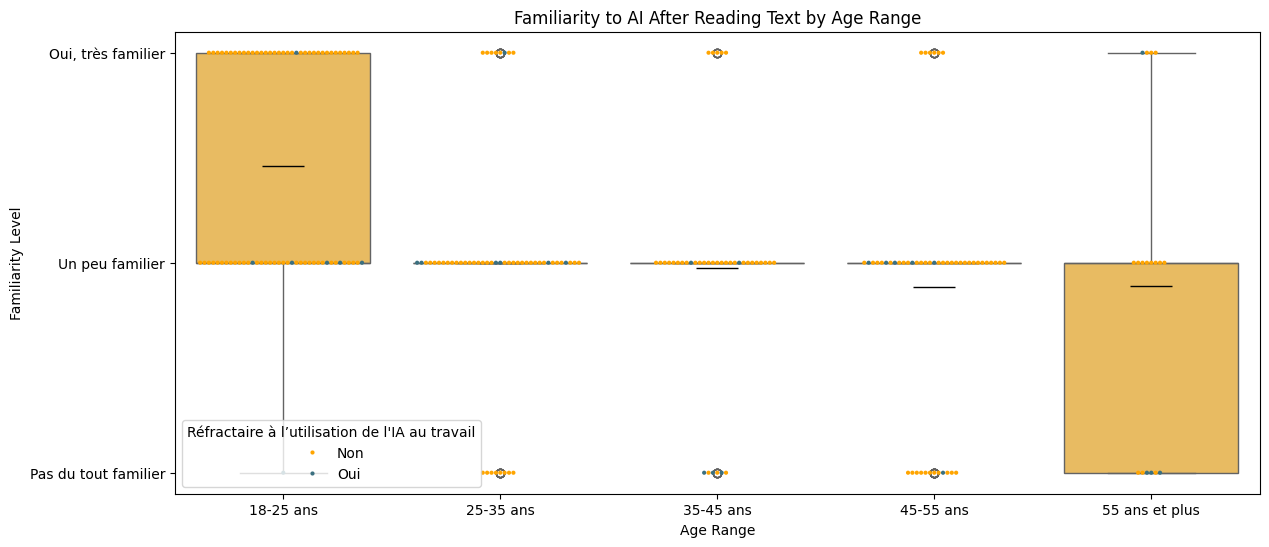

In [83]:
# 2/7 Mean Openness Level to AI After Reading Text by Age Range
df_familiarity_age_box = df_survey[['Age', '*Familiarity', 'Resistance']].copy()

#todo simplifier le graph
#todo tracer les moyennes des refractaires en proportion
#todo tracer les moyennes des familiarités en proportion

age_order = ["18-25 ans", "25-35 ans", "35-45 ans", "45-55 ans", "55 ans et plus"]
df_familiarity_age_box['Age'] = pd.Categorical(df_familiarity_age_box['Age'], categories=age_order, ordered=True)
df_familiarity_age_box = df_familiarity_age_box.sort_values('Age').reset_index(drop=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Age', y='*Familiarity', data=df_familiarity_age_box, color="#FFC34B")
sns.swarmplot(x='Age', y='*Familiarity', data=df_familiarity_age_box, hue='Resistance', palette=['orange', '#3B7080'], size=3)
sns.pointplot(x='Age', y='*Familiarity', data=df_familiarity_age_box, errorbar=None, color="black", linestyle="none", capsize=.2, marker="_", markersize=30, markeredgewidth=1,)
plt.legend(title='Réfractaire à l’utilisation de l\'IA au travail')
plt.title('Familiarity to AI After Reading Text by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Familiarity Level')
plt.xticks(rotation=0)
familiarity_order = ["Pas du tout familier", "Un peu familier", "Oui, très familier"]
plt.yticks([0, 1, 2], familiarity_order)
plt.show()

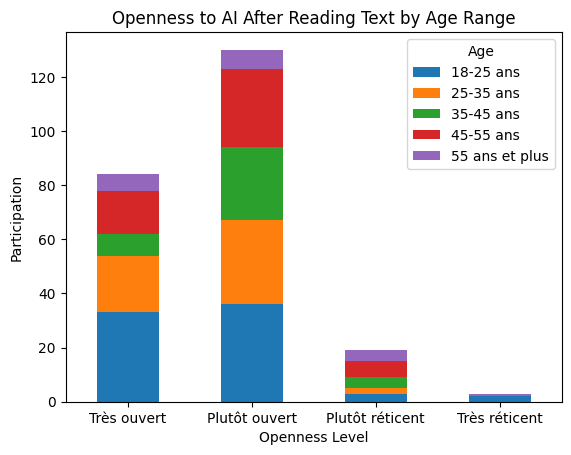

In [84]:
# 2/7 Openness to AI After Reading Text by Age Range
openness_age = df_survey.groupby([
  'Age',
  'Openness'
]).size().unstack(0).reindex([
  'Très ouvert',
  'Plutôt ouvert',
  'Plutôt réticent',
  'Très réticent'
])
openness_age.plot(kind='bar', stacked=True)
plt.title('Openness to AI After Reading Text by Age Range')
plt.xlabel('Openness Level')
plt.ylabel('Participation')
plt.xticks(rotation=0)
plt.show()

c:\Users\109768706\Git\paris1-iae-ai_adoption_by_employees\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

c:\Users\109768706\Git\paris1-iae-ai_adoption_by_employees\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning:

14.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



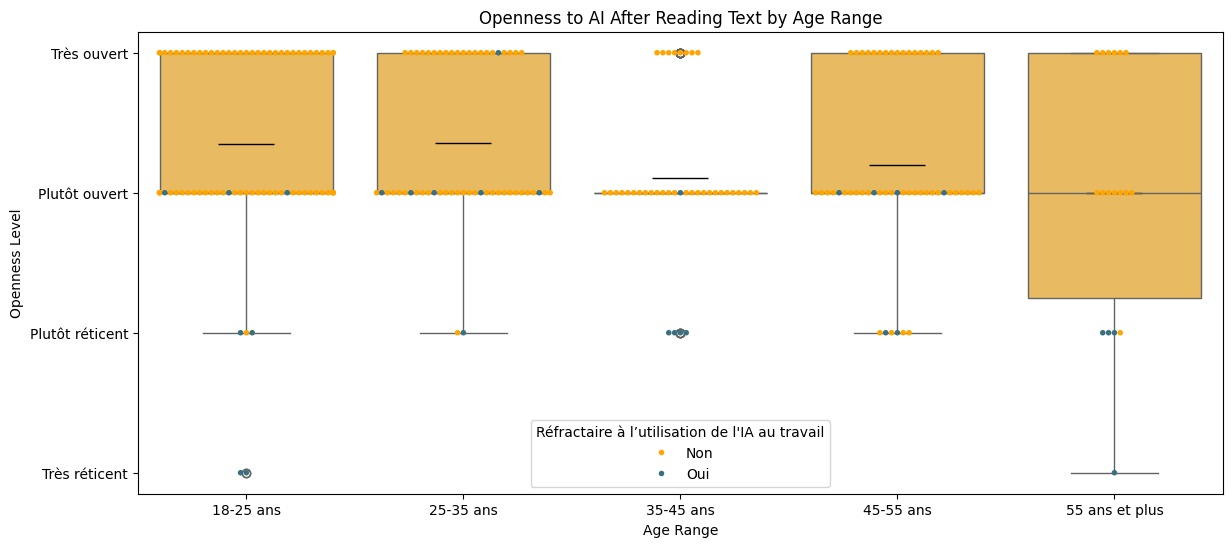

,timestamp,Gender,Age,_Sector,_Department,Familiarity,Resistance,Openness,Usage,Tools,...,Suggestions,Sector,Department,SupportDepartment,*Familiarity,*Openness,*Usage,*LossOfAutonomy,*ReducedThinking,*WillingnessForTraining
7,06/05/2024 15:20:39,Homme,35-45 ans,Immobilier,Vente/Commercialisation,Un peu familier,Non,Très ouvert,Parfois,"{Reconnaissance faciale/biometrique, Assistant...",...,NaN,Immobilier et Construction,Ventes et Marketing,opé,1,3,2,0.0,0.0,2
36,06/05/2024 23:32:25,Femme,18-25 ans,Construction et génie civil,Gestion de projet,Un peu familier,Non,Plutôt ouvert,Rarement,"{Reconnaissance faciale/biometrique, Assistant...",...,NaN,Immobilier et Construction,Gestion de Projet,opé,1,2,1,1.0,1.0,2
136,14/05/2024 16:21:38,Homme,35-45 ans,Industrie,R&D,Un peu familier,Non,Plutôt ouvert,Parfois,"{Reconnaissance faciale/biometrique, Language ...",...,NaN,Industrie et Technique,R&D,opé,1,2,2,1.0,2.0,1
146,15/05/2024 15:11:45,Femme,45-55 ans,Immobilier,Juridique,Un peu familier,Non,Très ouvert,Rarement,"{Reconnaissance faciale/biometrique, Language ...",...,NaN,Immobilier et Construction,Juridique,sup,1,3,1,1.0,1.0,2
160,17/05/2024 16:01:41,Femme,45-55 ans,Immobilier,Direction,Un peu familier,Non,Plutôt ouvert,Parfois,{Language Model},...,NaN,Immobilier et Construction,Direction et Management,dir,1,2,2,2.0,2.0,0
163,19/05/2024 14:41:18,Femme,55 ans et plus,Immobilier,Ressources Humaines,Un peu familier,Non,Plutôt ouvert,Parfois,"{Autres, Language Model}",...,NaN,Immobilier et Construction,RH,sup,1,2,2,1.0,1.0,2


In [85]:
# 2/7 Mean Openness Level to AI After Reading Text by Age Range
df_openness = df_survey[['Age', '*Openness', 'Resistance']].copy()

age_order = ["18-25 ans", "25-35 ans", "35-45 ans", "45-55 ans", "55 ans et plus"]
df_openness['Age'] = pd.Categorical(df_openness['Age'], categories=age_order, ordered=True)
df_openness = df_openness.sort_values('Age').reset_index(drop=True)

plt.figure(figsize=(14, 6))
sns.boxplot(x='Age', y='*Openness', data=df_openness, color="#FFC34B")
sns.swarmplot(x='Age', y='*Openness', data=df_openness, hue='Resistance', palette=['orange', '#3B7080'], size=4)
sns.pointplot(x='Age', y='*Openness', data=df_openness, errorbar=None, color="black", linestyle="none", capsize=.2, marker="_", markersize=40, markeredgewidth=1,)
plt.legend(title='Réfractaire à l’utilisation de l\'IA au travail')
plt.title('Openness to AI After Reading Text by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Openness Level')
plt.xticks(rotation=0)
plt.yticks([0, 1, 2, 3], ['Très réticent', 'Plutôt réticent', 'Plutôt ouvert', 'Très ouvert'])
plt.show()

# we can now plot outliers (18-25 ans, Très réticent) & (35-45 ans, Très réticent)
df_outliers = df_survey[
  ((df_openness['Age'] == '18-25 ans')
  & (df_openness['*Openness'] == 0))
  | ((df_openness['Age'] == '35-45 ans')
  & (df_openness['*Openness'] <= 1))
]

display(df_outliers)


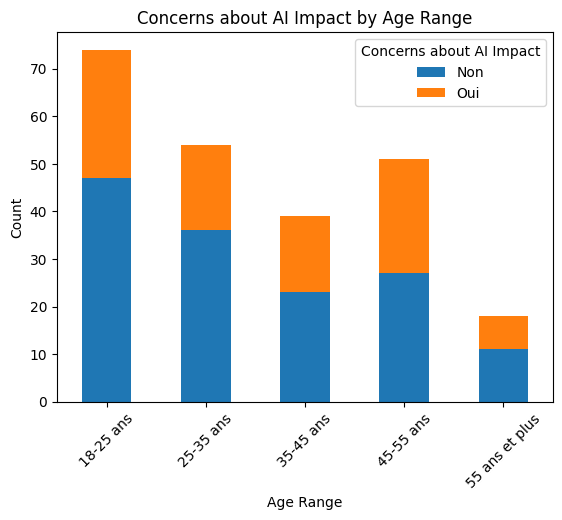

In [86]:
# 2/13 Concerns about AI Impact by Age Range
concerns_age = df_survey.groupby('Age')['Concerns'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Concerns about AI Impact by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Concerns about AI Impact')
plt.show()

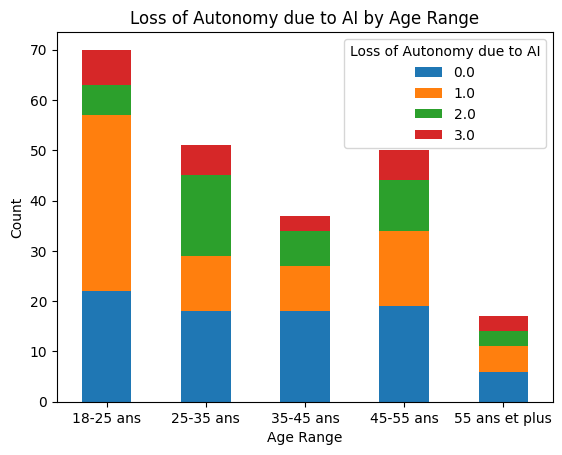

In [87]:
# 2/14 Loss of Autonomy due to AI by Age Range

loss_autonomy_gender = df_survey.groupby('Age')[
    '*LossOfAutonomy'
].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Loss of Autonomy due to AI by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Loss of Autonomy due to AI')
plt.show()

## ✅ 7. Perte de l'autonomie / age

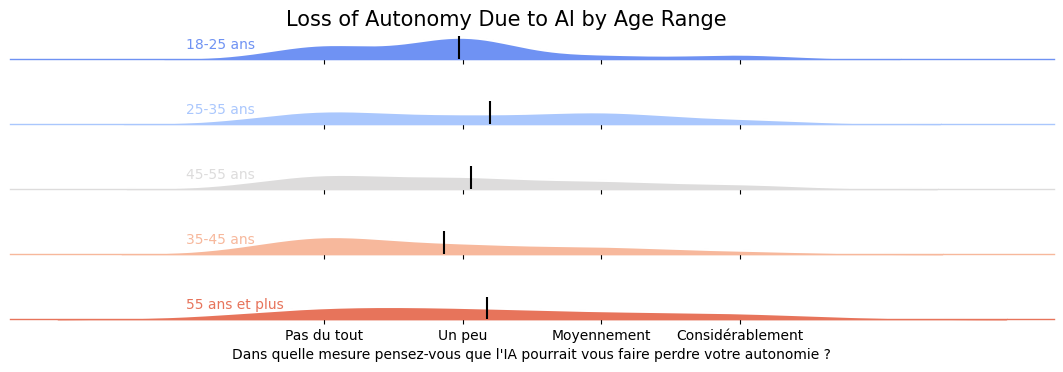

In [88]:
# Generate a color palette with Seaborn
pal = sns.color_palette(palette='coolwarm', n_colors=len(df_survey['Age'].unique()))

# Create the FacetGrid object
g = sns.FacetGrid(df_survey, row='Age', hue='Age', aspect=15, height=0.75, palette=pal)

# Add the densities kdeplots for each age range
g.map(sns.kdeplot, '*LossOfAutonomy',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# Add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, '*LossOfAutonomy',
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# Add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=1, clip_on=False)

# Add age range as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-1, 0.25, df_survey['Age'].unique()[i],
            fontsize=10,
            color=ax.lines[-1].get_color())

    mean_value = df_survey[df_survey['Age'] == df_survey['Age'].unique()[i]]['*LossOfAutonomy'].mean()
    ax.axvline(mean_value, color='black')

# Remove axes titles, yticks, and spines
g.set_titles("")
g.set(yticks=[])
g.set(ylabel="")  # Remove y label
g.despine(bottom=True, left=True)


g.fig.suptitle('Loss of Autonomy Due to AI by Age Range', fontsize=15)
plt.xlabel('Dans quelle mesure pensez-vous que l\'IA pourrait vous faire perdre votre autonomie ?')

labels = ['Pas du tout', 'Un peu', 'Moyennement', 'Considérablement']
g.set(xticks=range(0, 4), xticklabels=labels)

plt.show()

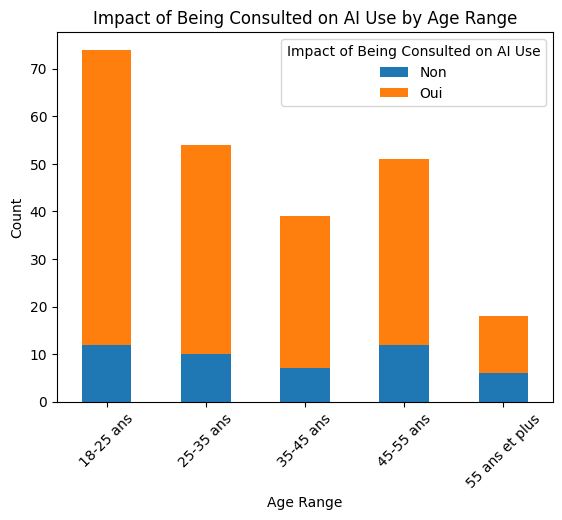

In [89]:
# 2/20 Impact of Being Consulted on AI Use by Age Range
impact_consulted_age = df_survey.groupby('Age')['ImpactOfBeingInvolved'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Impact of Being Consulted on AI Use by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Impact of Being Consulted on AI Use')
plt.show()

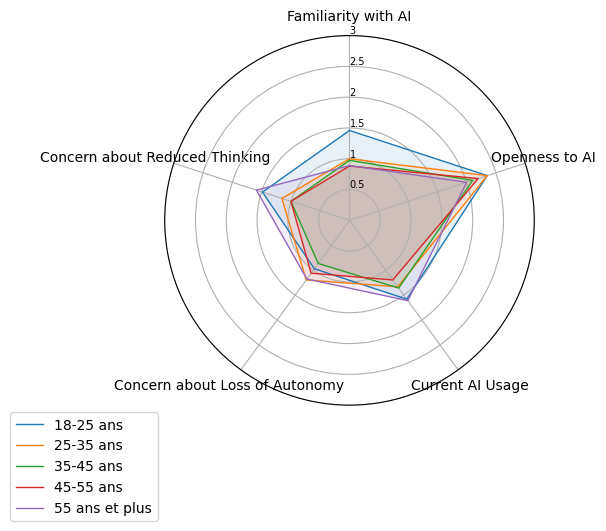

In [90]:
# Group by age range and calculate mean
age_general_data = df_survey.groupby('Age')[[
    '*Familiarity',
    '*Openness',
    '*Usage',
    '*LossOfAutonomy',
    '*ReducedThinking'
]].mean()

age_general_data.rename(columns={
    '*Familiarity': 'Familiarity with AI',
    '*Openness': 'Openness to AI',
    '*Usage': 'Current AI Usage',
    '*LossOfAutonomy': 'Concern about Loss of Autonomy',
    '*ReducedThinking': 'Concern about Reduced Thinking'
}, inplace=True)

# Reset index to make 'Age' a column again
age_general_data.reset_index(inplace=True)

# Rename 'Age' to 'age_group' to match the previous example
age_general_data.rename(columns={'Age': 'age_group'}, inplace=True)

# number of variable
survey_categories = list(age_general_data)[1:]
num_categories = len(survey_categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
axis_angles = [n / float(num_categories) * 2 * pi for n in range(num_categories)]
axis_angles += axis_angles[:1]

# Initialise the spider plot
spider_plot = plt.subplot(111, polar=True)

# If you want the first axis to be on top:
spider_plot.set_theta_offset(pi / 2)
spider_plot.set_theta_direction(-1)

# Draw one axe per variable + add labels
plt.xticks(axis_angles[:-1], survey_categories)

# Draw ylabels
spider_plot.set_rlabel_position(0)
plt.yticks([0.5, 1, 1.5, 2, 2.5, 3], ["0.5", "1", "1.5", "2", "2.5", "3"], color="black", size=7)
plt.ylim(0,3)

# Plot each individual = each line of the data
for i, row in age_general_data.iterrows():
    category_values = row.drop('age_group').values.flatten().tolist()
    category_values += category_values[:1]
    spider_plot.plot(axis_angles, category_values, linewidth=1, linestyle='solid', label=str(row['age_group']))
    spider_plot.fill(axis_angles, category_values, alpha=0.1)

plt.legend(loc='upper right', bbox_to_anchor=(0, 0))
plt.show()

## ✅ 9. Réduction de capacité / age

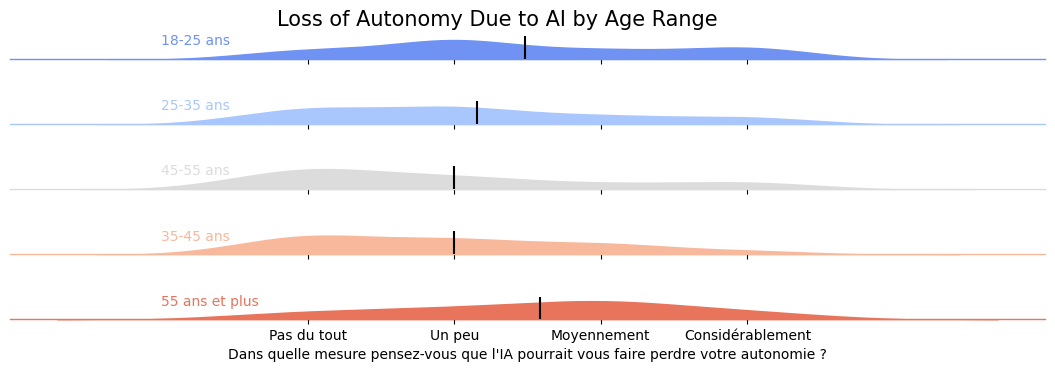

In [134]:
# Generate a color palette with Seaborn
pal = sns.color_palette(palette='coolwarm', n_colors=len(df_survey['Age'].unique()))

# Create the FacetGrid object
g = sns.FacetGrid(df_survey, row='Age', hue='Age', aspect=15, height=0.75, palette=pal)

# Add the densities kdeplots for each age range
g.map(sns.kdeplot, '*ReducedThinking',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)

# Add a white line that represents the contour of each kdeplot
g.map(sns.kdeplot, '*ReducedThinking',
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

# Add a horizontal line for each plot
g.map(plt.axhline, y=0,
      lw=1, clip_on=False)

# Add age range as text with the right color
for i, ax in enumerate(g.axes.flat):
    ax.text(-1, 0.25, df_survey['Age'].unique()[i],
            fontsize=10,
            color=ax.lines[-1].get_color())

    mean_value = df_survey[df_survey['Age'] == df_survey['Age'].unique()[i]]['*ReducedThinking'].mean()
    ax.axvline(mean_value, color='black')

# Remove axes titles, yticks, and spines
g.set_titles("")
g.set(yticks=[])
g.set(ylabel="")  # Remove y label
g.despine(bottom=True, left=True)


g.fig.suptitle('Loss of Autonomy Due to AI by Age Range', fontsize=15)
plt.xlabel('Dans quelle mesure pensez-vous que l\'IA pourrait vous faire perdre votre autonomie ?')

labels = ['Pas du tout', 'Un peu', 'Moyennement', 'Considérablement']
g.set(xticks=range(0, 4), xticklabels=labels)

plt.show()

# ❓ 3&4. Dans quel secteur d'activité êtes vous ?

- [x] 3&4/5 Familiarité avec l'IA par secteur d'activité et service
- [ ] 3&4/6 Réfractarité à l’utilisation de l'IA au travail par secteur d'activité et service
- [ ] 3&4/7 Ouverture à l'utilisation des outils utilisant l'IA par secteur d'activité et service
- [x] 3&4/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par secteur d'activité et service
- [x] 3&4/10 Motivations pour utiliser des outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/11 Problèmes rencontrés avec les outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par secteur d'activité et service
- [ ] 3&4/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par secteur d'activité et service
- [ ] 3&4/14 Perception de la perte d'autonomie due à l'IA par secteur d'activité et service
- [ ] 3&4/15 Perception de la réduction des capacités de réflexion due à l'IA par secteur d'activité et service
- [ ] 3&4/16 Crainte de perdre son emploi à cause de l'IA par secteur d'activité et service
- [ ] 3&4/17 Autres inquiétudes face à l'arrivée de l'IA par secteur d'activité et service
- [ ] 3&4/18 Inclusion dans le développement d'outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par secteur d'activité et service
- [ ] 3&4/20 Inclination à utiliser l'IA après consultation par secteur d'activité et service
- [ ] 3&4/21 Disposition à suivre une formation sur les technologies basées sur l'IA par secteur d'activité et service
- [ ] 3&4/22 Commentaires et suggestions sur l'arrivée de l'IA par secteur d'activité et service

---

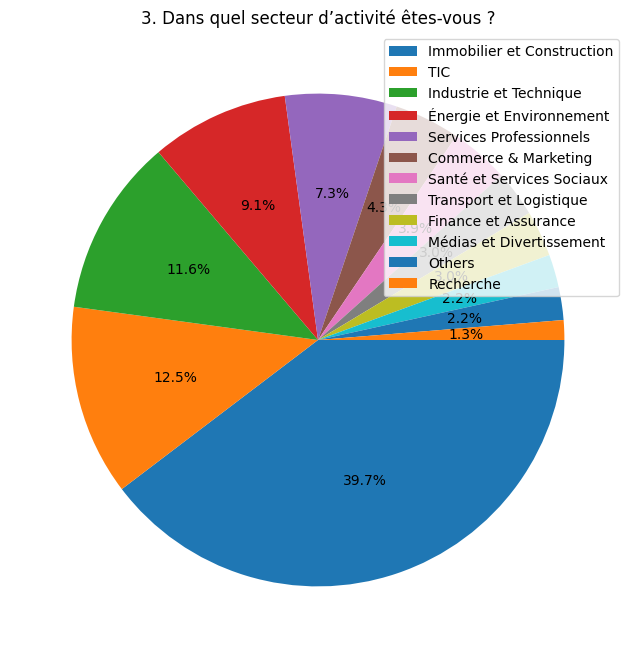

In [91]:
plot_pie('Sector', '3. Dans quel secteur d’activité êtes-vous ?')

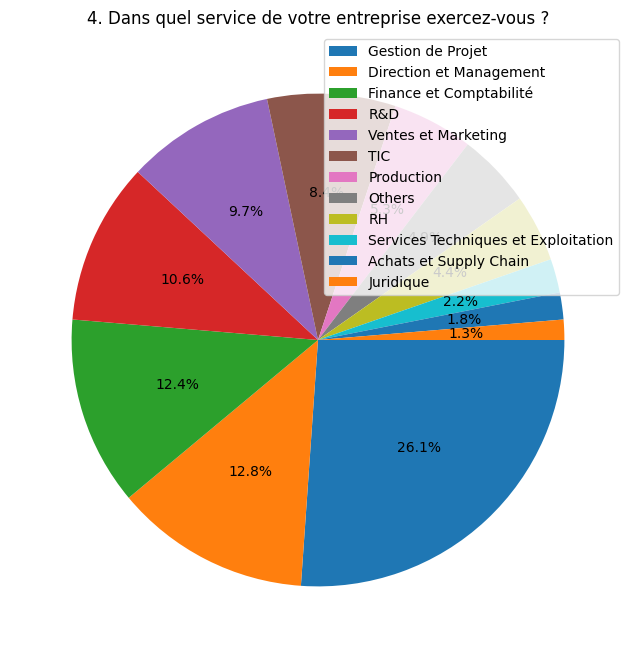

In [92]:
plot_pie('Department', '4. Dans quel service de votre entreprise exercez-vous ?')

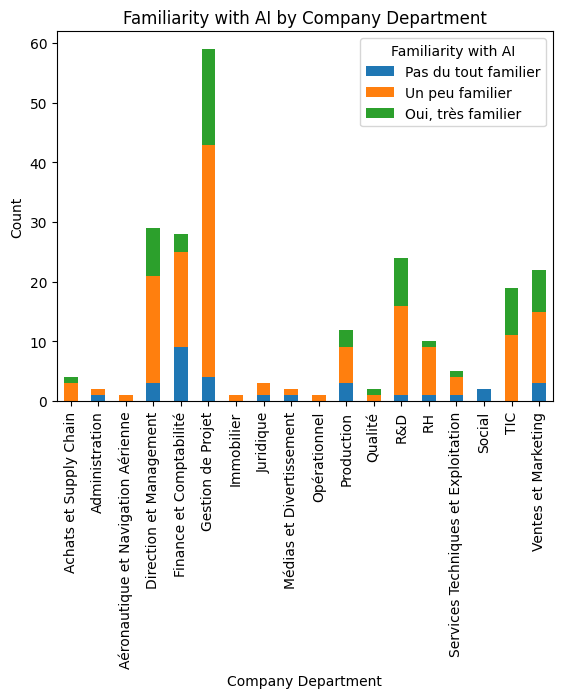

In [93]:
# 3&4/5 Familiarity with AI by Company Department
# faire le 3
familiarity_department = df_survey.groupby('Department')[
    'Familiarity'
].value_counts().unstack().reindex(columns=[
    'Pas du tout familier',
    'Un peu familier',
    'Oui, très familier'
]).plot(kind='bar', stacked=True)
plt.title('Familiarity with AI by Company Department')
plt.xlabel('Company Department')
plt.ylabel('Count')
plt.legend(title='Familiarity with AI')
plt.show()

# ✅ 2. Réfractaire / secteur & service

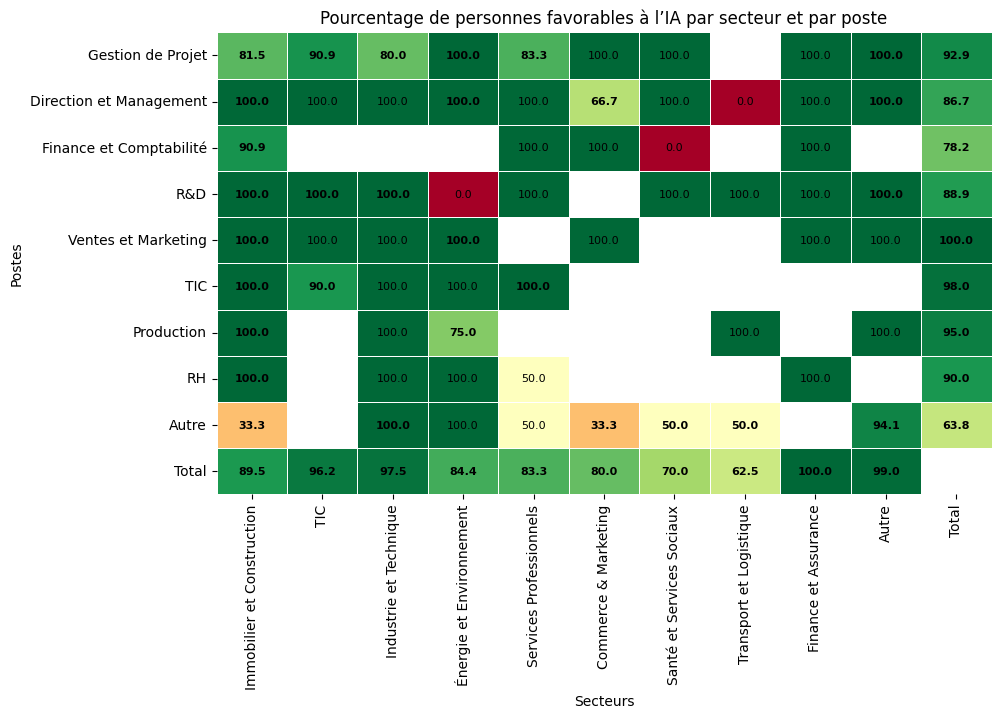

In [133]:
# 3&4/6 Resistance to AI by Sector and Department

DEPARTMENT_THRESHOLD = 5
SECTOR_THRESHOLD = 5

MIN_COUNT_THRESHOLD = 3

OTHER_LABEL = 'Autre'
TOT_LABEL = 'Total'

# Filter departments and sectors with more than threshold responses
valid_departments = df_survey['Department'].value_counts()[lambda x: x > DEPARTMENT_THRESHOLD].index
valid_sectors = df_survey['Sector'].value_counts()[lambda x: x > SECTOR_THRESHOLD].index

# Filter dataframe based on valid departments and sectors
filtered_df = df_survey[df_survey['Department'].isin(valid_departments) & df_survey['Sector'].isin(valid_sectors)]
filtered_df = filtered_df[['Department', 'Sector', 'Resistance']]

for index, row in df_survey.iterrows():
    new_rows = []
    if row['Department'] in valid_departments:
        if row['Sector'] not in valid_sectors:
            new_rows.append({'Department': row['Department'], 'Sector': OTHER_LABEL, 'Resistance': row['Resistance']})
    if row['Sector'] in valid_sectors:
        if row['Department'] not in valid_departments:
            new_rows.append({'Department': OTHER_LABEL, 'Sector': row['Sector'], 'Resistance': row['Resistance']})
    else:
        new_rows.append({'Department': OTHER_LABEL, 'Sector': OTHER_LABEL, 'Resistance': row['Resistance']})

    filtered_df = pd.concat([filtered_df, pd.DataFrame(new_rows)], ignore_index=True)

all_sectors = list(valid_sectors) + [OTHER_LABEL]
all_departments = list(valid_departments) + [OTHER_LABEL]

# Calculate percentage of 'Non' for each valid sector and department
table_data = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=float)
# please GPT fill this table with the number of responses for each sector and department cell
table_data_count = pd.DataFrame(index=all_departments, columns=all_sectors, dtype=int)

department_totals = {department: 0 for department in all_departments}
sector_totals = {sector: 0 for sector in all_sectors}

for department in all_departments:
    for sector in all_sectors:
        subset = filtered_df[(filtered_df['Department'] == department) & (filtered_df['Sector'] == sector)]
        count = len(subset)
        if len(subset) > 0:
            percentage = (subset['Resistance'].value_counts(normalize=True).get('Non', 0)) * 100
            table_data.loc[department, sector] = percentage
            department_totals[department] += percentage
            sector_totals[sector] += percentage
        table_data_count.loc[department, sector] = count

# Calculate average totals
for department in department_totals:
    department_totals[department] /= table_data.loc[department].count()
for sector in sector_totals:
    sector_totals[sector] /= table_data[sector].count()

# Add totals to the table
for department in all_departments:
    table_data.loc[department, TOT_LABEL] = department_totals[department]
    table_data_count.loc[department, TOT_LABEL] = sum(table_data_count.loc[department, all_sectors])
for sector in all_sectors:
    table_data.loc[TOT_LABEL, sector] = sector_totals[sector]
    table_data_count.loc[TOT_LABEL, sector] = sum(table_data_count.loc[all_departments, sector])

# Plot heatmap with red background
plt.figure(figsize=(10, 6))
ax = sns.heatmap(table_data, cmap='RdYlGn', cbar=False, linewidths=.5)

# Add annotations manually
for i in range(table_data_count.shape[0]):
    for j in range(table_data_count.shape[1]):
        if not pd.isna(table_data.iloc[i, j]):
            if table_data_count.iloc[i, j] >= MIN_COUNT_THRESHOLD:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.1f}",
                        color='black', ha='center', va='center',
                        fontweight='bold', fontsize=8)
            else:
                ax.text(j+0.5, i+0.5, f"{table_data.iloc[i, j]:.1f}",
                        color='black', ha='center', va='center',
                        fontsize=8)

plt.title('Pourcentage de personnes favorables à l’IA par secteur et par poste')
plt.xlabel('Secteurs')
plt.ylabel('Postes')
plt.show()

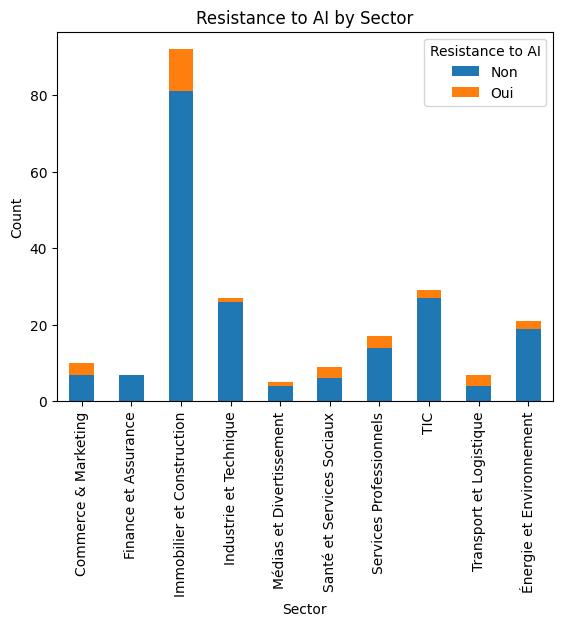

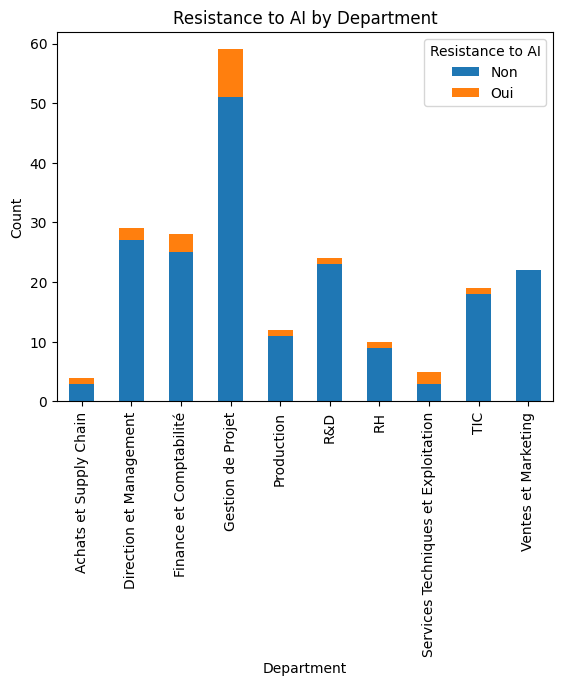

In [95]:
# Resistance to AI by sector
resistance_sector = df_survey.groupby('Sector')['Resistance'].value_counts().unstack()
# Drop sectors where less than 4 people voted
total_votes_per_sector = resistance_sector.sum(axis=1)
resistance_sector = resistance_sector[total_votes_per_sector >= 4]
resistance_sector.plot(kind='bar', stacked=True)
plt.title('Resistance to AI by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.legend(title='Resistance to AI')
plt.show()

# Resistance to AI by Department
resistance_department = df_survey.groupby('Department')['Resistance'].value_counts().unstack()
# Drop sectors where less than 4 people voted
total_votes_per_department = resistance_department.sum(axis=1)
resistance_department = resistance_department[total_votes_per_department >= 4]
resistance_department.plot(kind='bar', stacked=True)
plt.title('Resistance to AI by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Resistance to AI')
plt.show()

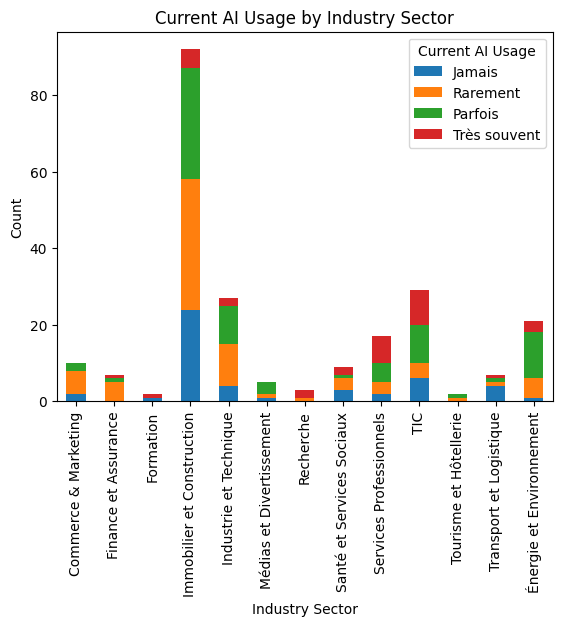

In [96]:
# 3&4/8 Current AI Usage by Industry Sector
# a revoir y'a que 3
# rajouter les tools ?
current_usage_sector = df_survey.groupby('Sector')['Usage'].value_counts().unstack().reindex(columns=[
  'Jamais',
  'Rarement',
  'Parfois',
  'Très souvent'
])
current_usage_sector.drop('Unknown', inplace=True, axis=0)
current_usage_sector.plot(kind='bar', stacked=True)
plt.title('Current AI Usage by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.legend(title='Current AI Usage')
plt.show()

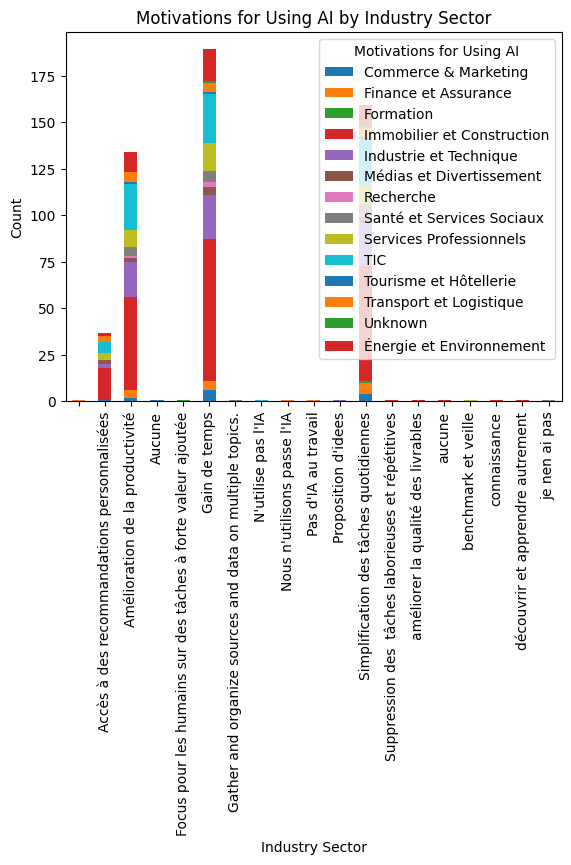

In [97]:
# 3&4/10 Motivations for Using AI by Industry Sector
motivations_sector = df_explod_motivations.groupby('Motivations')['Sector'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Motivations for Using AI by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Count')
plt.legend(title='Motivations for Using AI')
plt.show()

# ❓ 5. Êtes-vous familier avec l'IA ?
- [ ] 5/6 Réfractarité à l’utilisation de l'IA au travail par familiarité avec l'IA
- [ ] 5/7 Ouverture à l'utilisation des outils utilisant l'IA par familiarité avec l'IA
- [x] 5/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par familiarité avec l'IA
- [ ] 5/10 Motivations pour utiliser des outils basés sur l'IA par familiarité avec l'IA
- [x] 5/11 Problèmes rencontrés avec les outils basés sur l'IA par familiarité avec l'IA
- [x] 5/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par familiarité avec l'IA
- [ ] 5/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par familiarité avec l'IA
- [ ] 5/14 Perception de la perte d'autonomie due à l'IA par familiarité avec l'IA
- [ ] 5/15 Perception de la réduction des capacités de réflexion due à l'IA par familiarité avec l'IA
- [x] 5/16 Crainte de perdre son emploi à cause de l'IA par familiarité avec l'IA
- [ ] 5/17 Autres inquiétudes face à l'arrivée de l'IA par familiarité avec l'IA
- [ ] 5/18 Inclusion dans le développement d'outils basés sur l'IA par familiarité avec l'IA
- [ ] 5/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par familiarité avec l'IA
- [ ] 5/20 Inclination à utiliser l'IA après consultation par familiarité avec l'IA
- [ ] 5/21 Disposition à suivre une formation sur les technologies basées sur l'IA par familiarité avec l'IA
- [ ] 5/22 Commentaires et suggestions sur l'arrivée de l'IA par familiarité avec l'IA

---

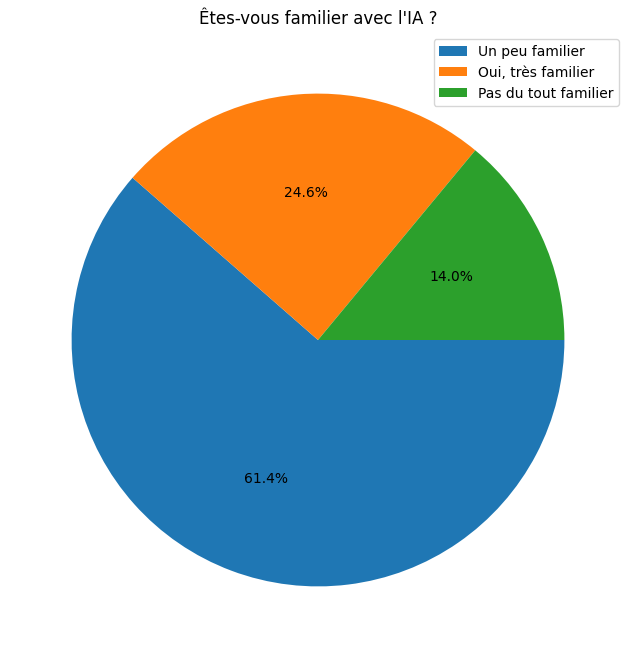

In [98]:
plot_pie('Familiarity', 'Êtes-vous familier avec l\'IA ?')

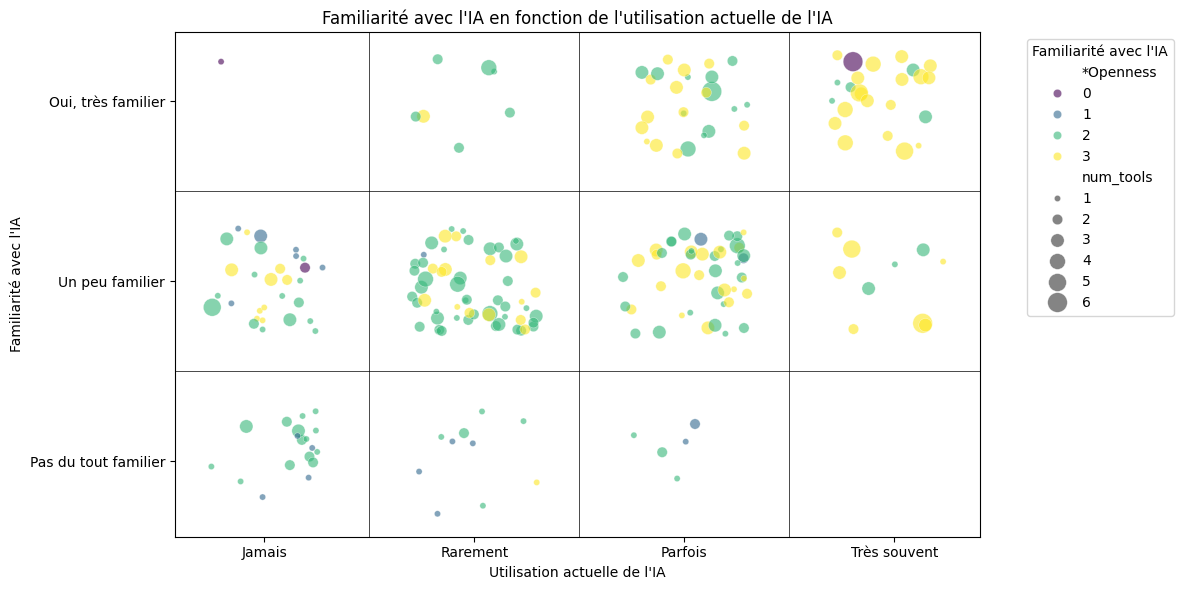

In [99]:
# 5/8&9 Check familiarity with AI avec "Usage" et "Tools"
## later we will maybe link it to the type of work
df_familiarity_tools = df_survey[['*Familiarity', '*Usage', 'Tools', '*Openness']].copy()

df_familiarity_tools['num_tools'] = df_familiarity_tools['Tools'].apply(len)

jitter_strength = 0.3
df_familiarity_tools['*Familiarity'] = df_familiarity_tools['*Familiarity'].apply(lambda x: x + np.random.uniform(-jitter_strength, jitter_strength))
df_familiarity_tools['*Usage'] = df_familiarity_tools['*Usage'].apply(lambda x: x + np.random.uniform(-jitter_strength, jitter_strength))

# Visualisation avec seaborn
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_familiarity_tools, x='*Usage', y='*Familiarity', size='num_tools',
  sizes=(20, 200), hue='*Openness', palette='viridis', alpha=0.6)

for x in range(3):
    plt.axvline(x+0.5, color='black', linewidth=0.5)
for y in range(2):
    plt.axhline(y+0.5, color='black', linewidth=0.5)

plt.title('Familiarité avec l\'IA en fonction de l\'utilisation actuelle de l\'IA')
plt.xlabel('Utilisation actuelle de l\'IA')
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'])
plt.ylabel('Familiarité avec l\'IA')
plt.yticks([0, 1, 2], ['Pas du tout familier', 'Un peu familier', 'Oui, très familier'])
plt.legend(title='Familiarité avec l\'IA', bbox_to_anchor=(1.05, 1), loc=2)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

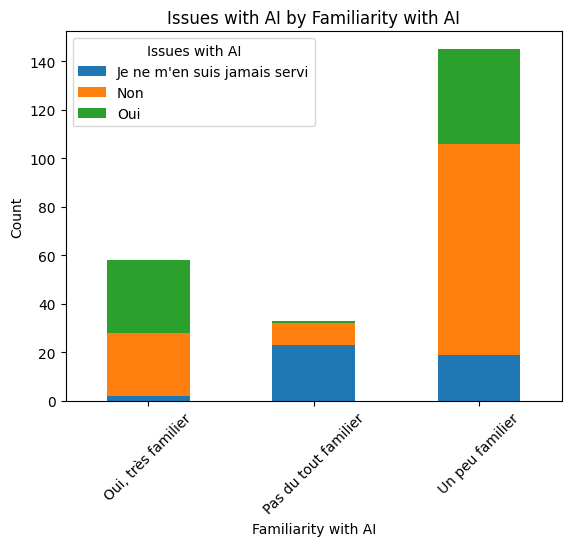

In [100]:
# 5/11 Issues with AI by Familiarity with AI
# faire les details en plus dans le graph
issues_familiarity = df_survey.groupby('Familiarity')['Issues'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Issues with AI by Familiarity with AI')
plt.xlabel('Familiarity with AI')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Issues with AI')
plt.show()

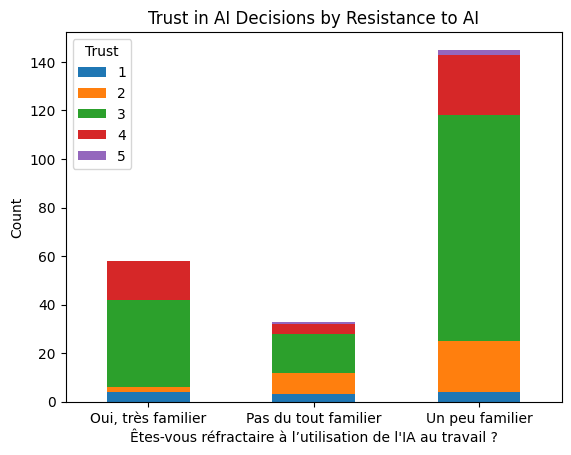

In [101]:
# 5/12 Trust in AI Decisions by Familiarity with AI
# Les gens qui trust connaissent bien la techno : on peut vérifier ça aussi avec "Usage" et "Tools" mais attention c'est lié au taff
trust_resistance = df_survey.groupby('Familiarity')['Trust'].value_counts().unstack()
trust_resistance.plot(kind='bar', stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

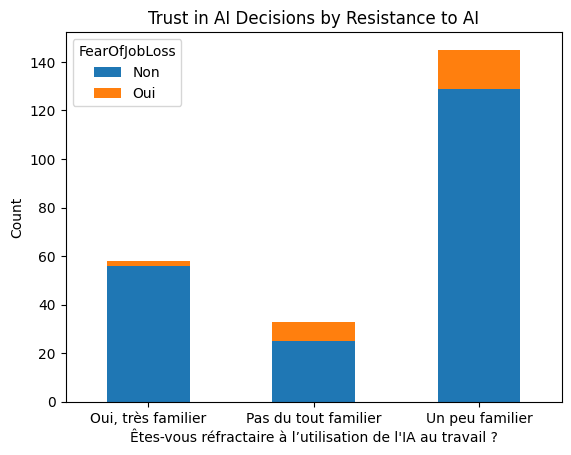

In [102]:
# 5/16 Familiarity by FearOfJobLoss
#? Les gens ont peur quand ils ne connaissent pas : on peut vérifier ça aussi avec "Usage" et "Tools" mais attention c'est lié au taff
trust_resistance = df_survey.groupby('Familiarity')['FearOfJobLoss'].value_counts().unstack()
trust_resistance.plot(kind='bar', stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# ❓ 6. Êtes-vous réfractaire à l’utilisation de l'IA au travail ?
- [ ] 6/7 Ouverture à l'utilisation des outils utilisant l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par réfractarité à l’utilisation de l'IA
- [ ] 6/10 Motivations pour utiliser des outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/11 Problèmes rencontrés avec les outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par réfractarité à l’utilisation de l'IA
- [ ] 6/14 Perception de la perte d'autonomie due à l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/15 Perception de la réduction des capacités de réflexion due à l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/16 Crainte de perdre son emploi à cause de l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/17 Autres inquiétudes face à l'arrivée de l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/18 Inclusion dans le développement d'outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/20 Inclination à utiliser l'IA après consultation par réfractarité à l’utilisation de l'IA
- [ ] 6/21 Disposition à suivre une formation sur les technologies basées sur l'IA par réfractarité à l’utilisation de l'IA
- [ ] 6/22 Commentaires et suggestions sur l'arrivée de l'IA par réfractarité à l’utilisation de l'IA

---

## ✅ 1. Réfractaire oui / non

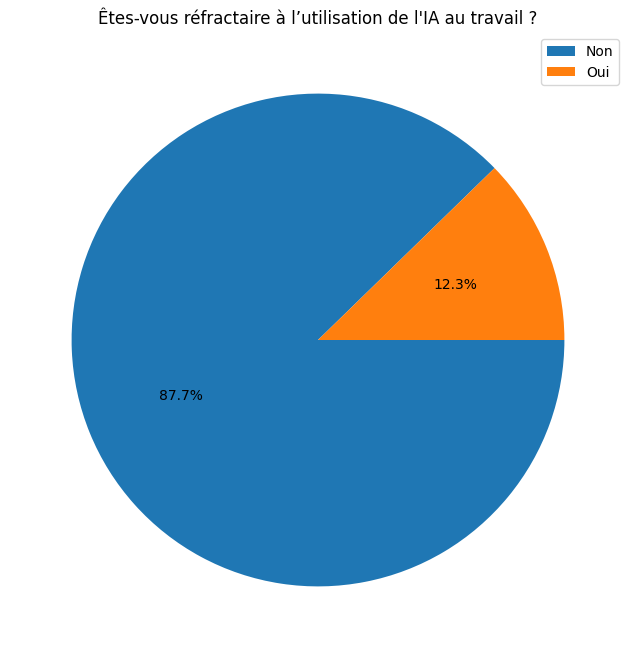

In [103]:
plot_pie('Resistance', 'Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')

✅ ON GARDE :  les deux vars sont décorélés 

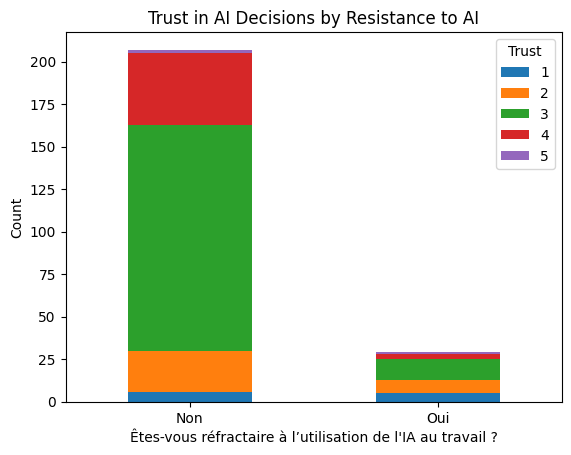

,timestamp,Gender,Age,_Sector,_Department,Familiarity,Resistance,Openness,Usage,Tools,...,Suggestions,Sector,Department,SupportDepartment,*Familiarity,*Openness,*Usage,*LossOfAutonomy,*ReducedThinking,*WillingnessForTraining
68,07/05/2024 16:55:03,Femme,45-55 ans,Immobilier,developpement,Un peu familier,Non,Plutôt ouvert,Rarement,"{Reconnaissance faciale/biometrique, Assistant...",...,NaN,Immobilier et Construction,R&D,opé,1,2,1,2.0,1.0,2
74,07/05/2024 19:35:06,Homme,18-25 ans,Finance et assurance,Vente/Commercialisation,"Oui, très familier",Non,Très ouvert,Parfois,"{Reconnaissance faciale/biometrique, Assistant...",...,NaN,Finance et Assurance,Ventes et Marketing,opé,2,3,2,0.0,0.0,2
89,08/05/2024 23:09:56,Homme,25-35 ans,Finance et assurance,R&D,Un peu familier,Non,Plutôt ouvert,Rarement,{Language Model},...,NaN,Finance et Assurance,R&D,opé,1,2,1,3.0,2.0,2
123,14/05/2024 09:41:13,Homme,45-55 ans,Médias et divertissement,Direction,Un peu familier,Non,Plutôt réticent,Parfois,"{Assistant vocal, Language Model}",...,NaN,Médias et Divertissement,Direction et Management,dir,1,1,2,2.0,3.0,1
216,30/05/2024 09:30:20,Femme,55 ans et plus,Chimie,Sécurité,"Oui, très familier",Non,Plutôt ouvert,Parfois,{Gestion des relations client},...,NaN,NaN,NaN,NaN,2,2,2,1.0,2.0,0
221,30/05/2024 12:45:28,Femme,45-55 ans,Commerce de détail,Finance/Comptabilité,Pas du tout familier,Non,Plutôt réticent,Jamais,{Aucun},...,Non,Commerce & Marketing,Finance et Comptabilité,sup,0,1,0,3.0,3.0,1


In [104]:
# 6/12 Trust in AI Decisions by Resistance to AI
trust_resistance = df_survey.groupby('Resistance')['Trust'].value_counts().unstack()
trust_resistance.plot(kind='bar', stacked=True)
plt.title('Trust in AI Decisions by Resistance to AI')
plt.xlabel('Êtes-vous réfractaire à l’utilisation de l\'IA au travail ?')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Certains réponde Non et ont un Trust in AI de 1 ? wtf
condition = (df_survey['Trust'] == 1) & (df_survey['Resistance'] == 'Non')
filtered_df = df_survey[condition]
display(filtered_df)

## ✅ 4. Réfractaire avant / après le texte explicatif

In [105]:
# compare Yes, No from Resistance with openess_to_ai_after_text

df_before_after = df_survey[['Resistance', 'Openness']].copy()

# Count occurrences of combinations of 'Resistance' and 'Openness' values
sankey_dict = df_before_after.apply(lambda row: f"{row['Resistance']}, {row['Openness']}", axis=1).value_counts().to_dict()
# Count standalone occurrences of 'Resistance' values
standalone_counts = df_before_after['Resistance'].value_counts().to_dict()
# Update sankey_dict with standalone counts
sankey_dict.update(standalone_counts)
# Create a dictionary to map labels from unique values of the columns
unique_labels = pd.unique(df_before_after.values.ravel('K'))
sankey_dict_ids = {label: idx for idx, label in enumerate(['root'] + unique_labels.tolist())}
# Construct DataFrame for Sankey diagram
data = [{'source': sankey_dict_ids['root'] if key in ['Oui', 'Non'] else sankey_dict_ids[key.split(', ')[0]],
         'target': sankey_dict_ids[key.split(', ')[1]] if ', ' in key else sankey_dict_ids[key],
         'value': value}
        for key, value in sankey_dict.items()]

df_sankey = pd.DataFrame(data)

labels = ['' if label == 'root' else label for label in sankey_dict_ids.keys()]
# Define colors for each label based on specific criteria
colors = [
    '#60CA6F' if label == 'Très ouvert' else
    '#FFED65' if label == 'Plutôt ouvert' else
    '#ECA948' if label == 'Plutôt réticent' else
    '#D84637' if label == 'Très réticent' else
    '#1982C4' if 'Oui' in label else
    '#594389' if 'Non' in label else
    '#F2D0A9' for label in labels
]

# Create a dictionary to map labels to colors with added transparency
label_to_color_rgba = {
    label: f"rgba({int(color[1:3], 16)}, {int(color[3:5], 16)}, {int(color[5:7], 16)}, 0.3)"
    for label, color in zip(labels, colors)
}
# Generate a color scale for the links based on the target node's color with transparency
link_colors_rgba = [label_to_color_rgba[labels[target]] for target in df_sankey['target']]

fig = go.Figure(data=[go.Sankey(
  node = dict(
    pad = 15,
    thickness = 20,
    line = dict(color = "black", width = 0.5),
    label = labels,
    color = colors  # Use the colors list here
  ),
  link = dict(
    source = df_sankey['source'],
    target = df_sankey['target'],
    value = df_sankey['value'],
    color = link_colors_rgba
  )
)], layout=go.Layout(
    height=500,
    font=dict(size=10),
    title='Sankey Diagram of AI Openness Transition'
))

fig.show()


# ❓ 7. Après avoir lu ce texte, à quel point êtes-vous ouvert à l'idée d'utiliser des outils utilisant l'IA ?
- [ ] 7/8&9 Utilisation des outils basés sur l'IA et types d'outils utilisés par ouverture à l'utilisation de l'IA
- [ ] 7/10 Motivations pour utiliser des outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/11 Problèmes rencontrés avec les outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par ouverture à l'utilisation de l'IA
- [ ] 7/14 Perception de la perte d'autonomie due à l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/15 Perception de la réduction des capacités de réflexion due à l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/16 Crainte de perdre son emploi à cause de l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/17 Autres inquiétudes face à l'arrivée de l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/18 Inclusion dans le développement d'outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/20 Inclination à utiliser l'IA après consultation par ouverture à l'utilisation de l'IA
- [ ] 7/21 Disposition à suivre une formation sur les technologies basées sur l'IA par ouverture à l'utilisation de l'IA
- [ ] 7/22 Commentaires et suggestions sur l'arrivée de l'IA par ouverture à l'utilisation de l'IA

---

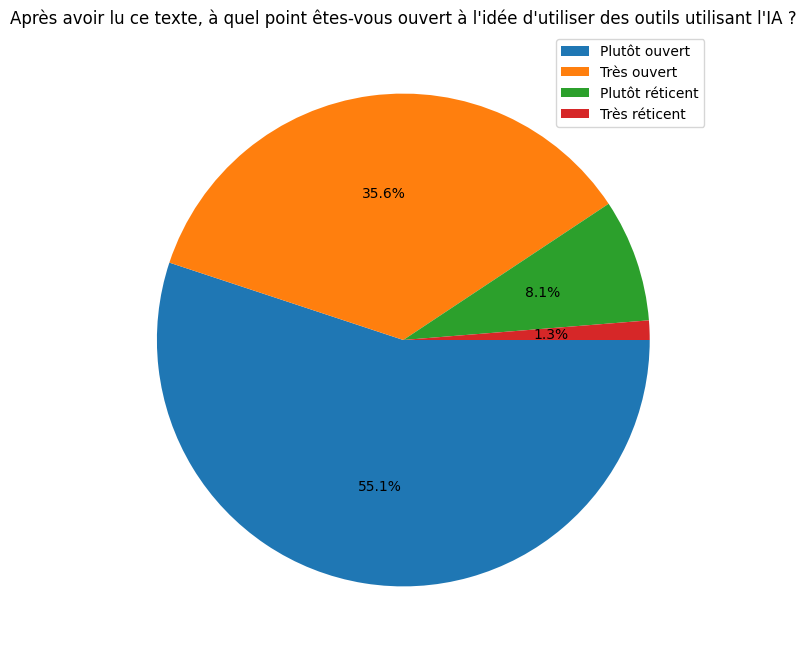

In [106]:
plot_pie('Openness', 'Après avoir lu ce texte, à quel point êtes-vous ouvert à l\'idée d\'utiliser des outils utilisant l\'IA ?')

# ❓ 8&9. Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l'IA ? Utilisez-vous les outils suivants ?
- [x] 8/9 Utilisation des outils basés sur le type d'outils
- [ ] 8&9/10 Motivations pour utiliser des outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/11 Problèmes rencontrés avec les outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par utilisation des outils IA et types d'outils
- [ ] 8&9/14 Perception de la perte d'autonomie due à l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/15 Perception de la réduction des capacités de réflexion due à l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/16 Crainte de perdre son emploi à cause de l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/17 Autres inquiétudes face à l'arrivée de l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/18 Inclusion dans le développement d'outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/20 Inclination à utiliser l'IA après consultation par utilisation des outils IA et types d'outils
- [ ] 8&9/21 Disposition à suivre une formation sur les technologies basées sur l'IA par utilisation des outils IA et types d'outils
- [ ] 8&9/22 Commentaires et suggestions sur l'arrivée de l'IA par utilisation des outils IA et types d'outils

---

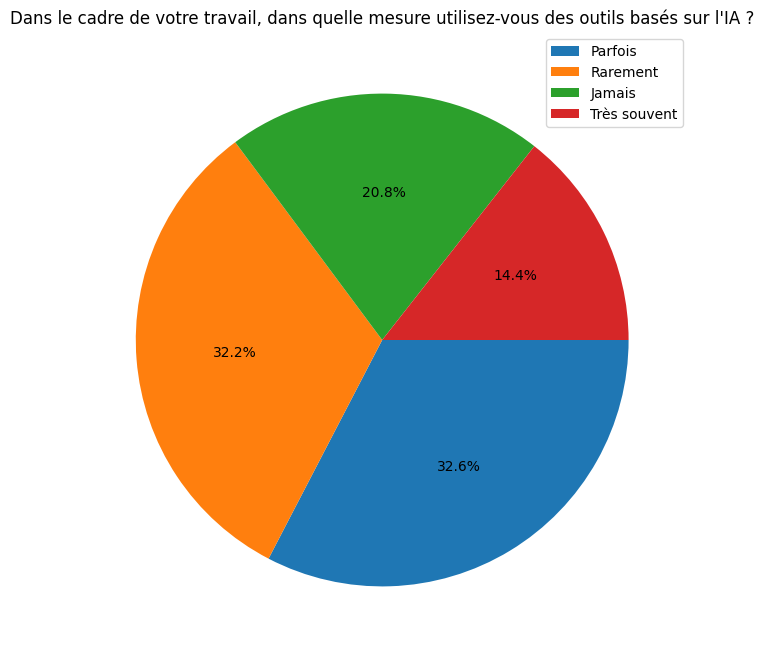

In [107]:
plot_pie('Usage', 'Dans le cadre de votre travail, dans quelle mesure utilisez-vous des outils basés sur l\'IA ?')

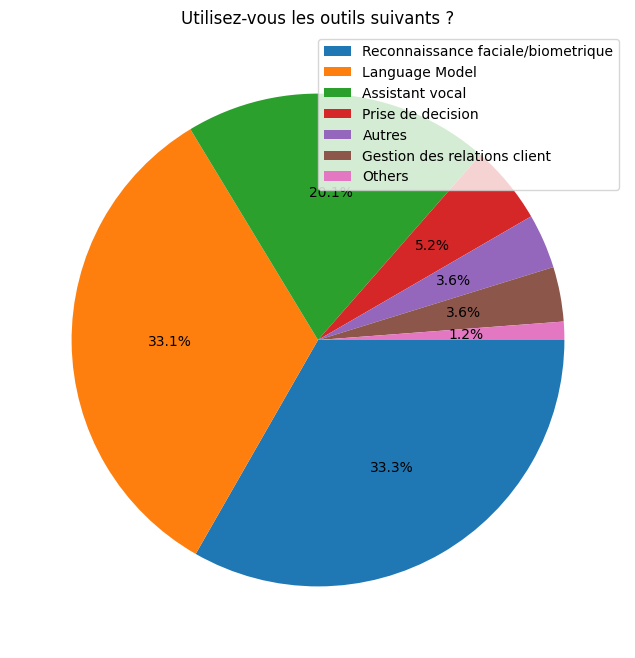

In [108]:
plot_pie('Tools', 'Utilisez-vous les outils suivants ?')


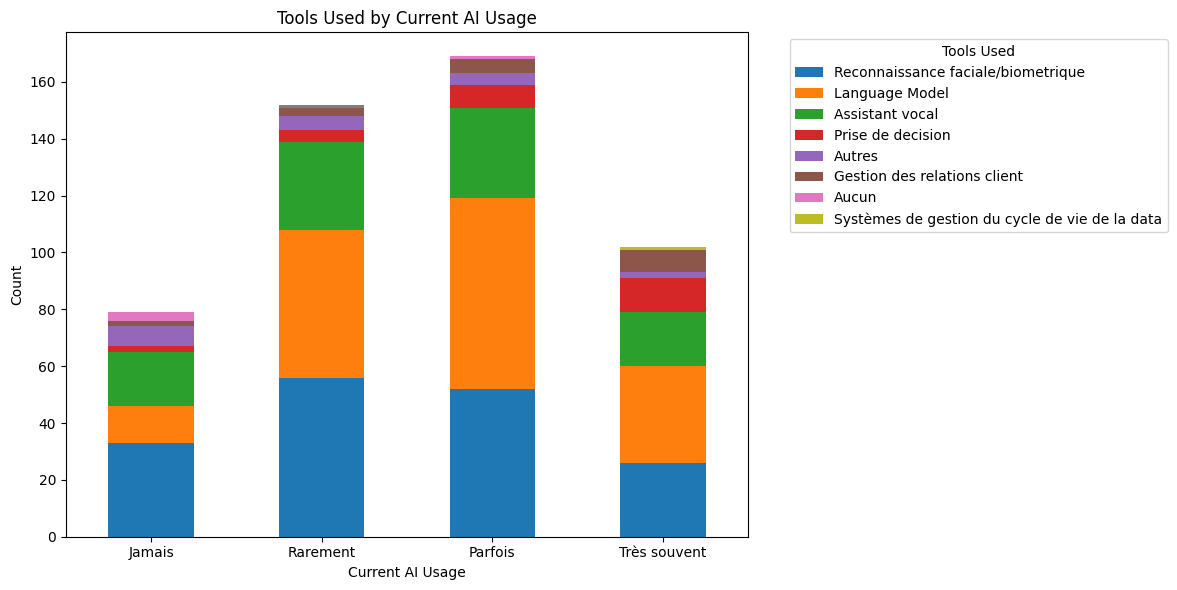

In [109]:
# 8/9 Tools Used by Current AI Usage
df_exploded = df_survey.explode('Tools')
df_grouped = df_exploded.groupby(['*Usage', 'Tools']).size().unstack().fillna(0)

# Sum the values for each tool and sort them
tool_order = df_grouped.sum().sort_values(ascending=False).index

# Sort the DataFrame according to the tool order
df_grouped = df_grouped[tool_order]

# Plot stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Tools Used by Current AI Usage')
plt.xlabel('Current AI Usage')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'], rotation=0)
plt.legend(title='Tools Used', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

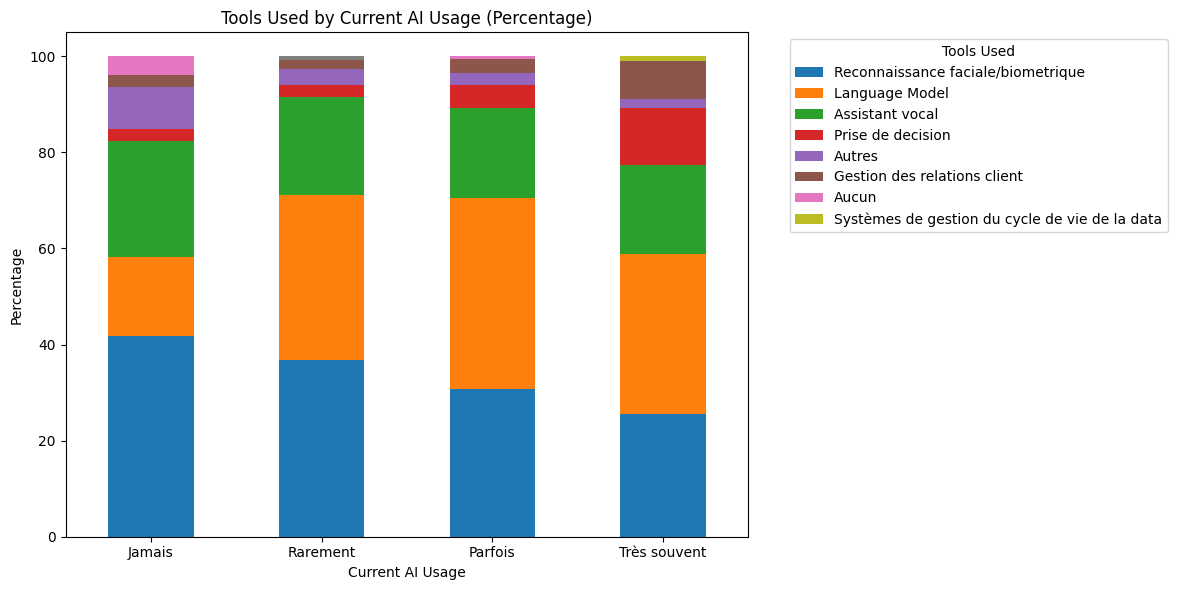

In [110]:
# Convert the values to percentages
df_grouped_percentage = df_grouped.divide(df_grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
df_grouped_percentage.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Tools Used by Current AI Usage (Percentage)')
plt.xlabel('Current AI Usage')
plt.ylabel('Percentage')
plt.xticks([0, 1, 2, 3], ['Jamais', 'Rarement', 'Parfois', 'Très souvent'], rotation=0)
plt.legend(title='Tools Used', bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

### 👀 Par technos quelles sont les peurs
#### ceux qui utilisent jamais d'IA, ils ont peur ou pas ?

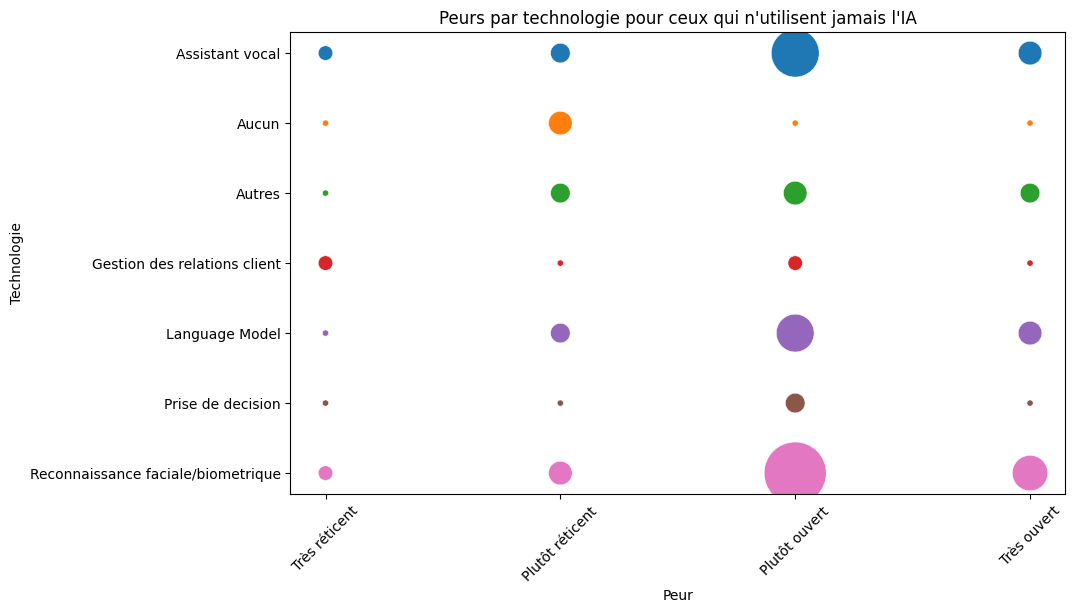

In [111]:
# 8/9 Tools Used by Current AI Usage
df_exploded = df_survey.explode('Tools')
df_never_use_ai = df_exploded[df_exploded['*Usage'] == 0]

# Group by technology and fear, and count the number of responses
fears_by_tech = df_never_use_ai.groupby(['Tools', '*Openness']).size().unstack().fillna(0)

# Calculate total responses for each technology
fears_by_tech['total'] = fears_by_tech.sum(axis=1)

# Reset index to convert index to columns
df_plot = fears_by_tech.reset_index()

# Melt the DataFrame to have one row per technology and fear
df_melted = df_plot.melt(id_vars=['Tools', 'total'], var_name='fear', value_name='count')

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_melted, x='fear', y='Tools', size='count', hue='Tools', sizes=(20, 2000), legend=False,)

plt.title('Peurs par technologie pour ceux qui n\'utilisent jamais l\'IA')
plt.xlabel('Peur')
plt.xticks([0, 1, 2, 3], ['Très réticent', 'Plutôt réticent', 'Plutôt ouvert', 'Très ouvert'])
plt.ylabel('Technologie')
plt.xticks(rotation=45)
plt.show()


# ❓ 10. Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l'IA ?
- [ ] 10/11 Problèmes rencontrés avec les outils basés sur l'IA par motivations
- [ ] 10/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par motivations
- [ ] 10/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par motivations
- [ ] 10/14 Perception de la perte d'autonomie due à l'IA par motivations
- [ ] 10/15 Perception de la réduction des capacités de réflexion due à l'IA par motivations
- [ ] 10/16 Crainte de perdre son emploi à cause de l'IA par motivations
- [ ] 10/17 Autres inquiétudes face à l'arrivée de l'IA par motivations
- [ ] 10/18 Inclusion dans le développement d'outils basés sur l'IA par motivations
- [ ] 10/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par motivations
- [ ] 10/20 Inclination à utiliser l'IA après consultation par motivations
- [ ] 10/21 Disposition à suivre une formation sur les technologies basées sur l'IA par motivations
- [ ] 10/22 Commentaires et suggestions sur l'arrivée de l'IA par motivations

---

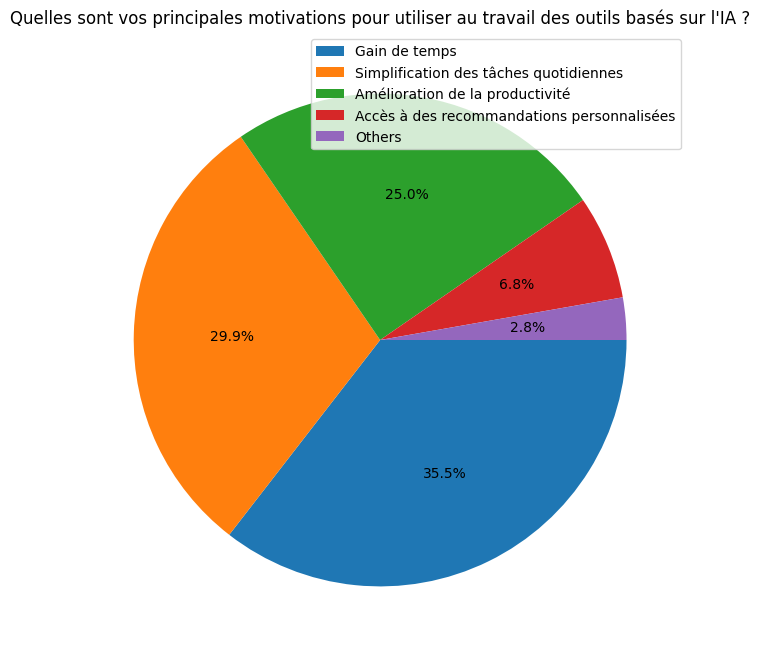

In [112]:
plot_pie('Motivations', 'Quelles sont vos principales motivations pour utiliser au travail des outils basés sur l\'IA ?')

# ❓ 11. Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?
- [ ] 11/12 Confiance dans les décisions prises par les systèmes basés sur l'IA par problèmes rencontrés
- [ ] 11/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par problèmes rencontrés
- [ ] 11/14 Perception de la perte d'autonomie due à l'IA par problèmes rencontrés
- [ ] 11/15 Perception de la réduction des capacités de réflexion due à l'IA par problèmes rencontrés
- [ ] 11/16 Crainte de perdre son emploi à cause de l'IA par problèmes rencontrés
- [ ] 11/17 Autres inquiétudes face à l'arrivée de l'IA par problèmes rencontrés
- [ ] 11/18 Inclusion dans le développement d'outils basés sur l'IA par problèmes rencontrés
- [ ] 11/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par problèmes rencontrés
- [ ] 11/20 Inclination à utiliser l'IA après consultation par problèmes rencontrés
- [ ] 11/21 Disposition à suivre une formation sur les technologies basées sur l'IA par problèmes rencontrés
- [ ] 11/22 Commentaires et suggestions sur l'arrivée de l'IA par problèmes rencontrés

---

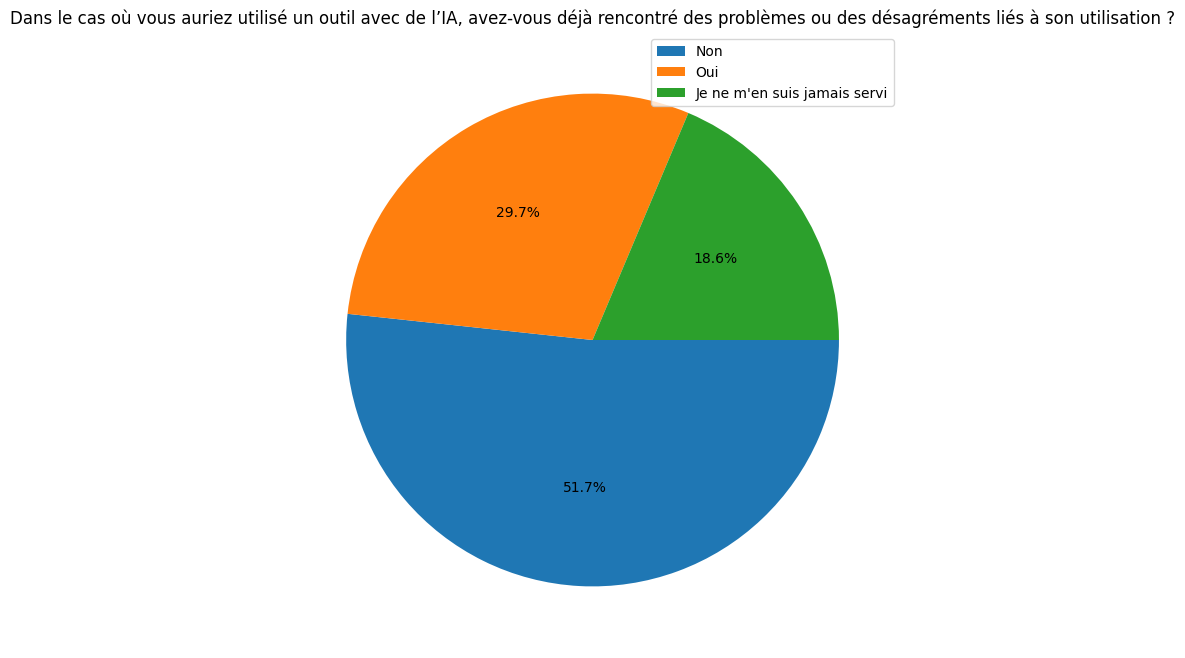

In [113]:
plot_pie('Issues', 'Dans le cas où vous auriez utilisé un outil avec de l’IA, avez-vous déjà rencontré des problèmes ou des désagréments liés à son utilisation ?')

# ❓ 12. Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l'IA ?
- [ ] 12/13 Inquiétudes quant à l'impact de l'IA sur la vie professionnelle par confiance dans l'IA
- [ ] 12/14 Perception de la perte d'autonomie due à l'IA par confiance dans l'IA
- [ ] 12/15 Perception de la réduction des capacités de réflexion due à l'IA par confiance dans l'IA
- [ ] 12/16 Crainte de perdre son emploi à cause de l'IA par confiance dans l'IA
- [ ] 12/17 Autres inquiétudes face à l'arrivée de l'IA par confiance dans l'IA
- [ ] 12/18 Inclusion dans le développement d'outils basés sur l'IA par confiance dans l'IA
- [ ] 12/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par confiance dans l'IA
- [ ] 12/20 Inclination à utiliser l'IA après consultation par confiance dans l'IA
- [x] 12/21 Disposition à suivre une formation sur les technologies basées sur l'IA par confiance dans l'IA
- [ ] 12/22 Commentaires et suggestions sur l'arrivée de l'IA par confiance dans l'IA

---

# ✅ 6. Confiance IA

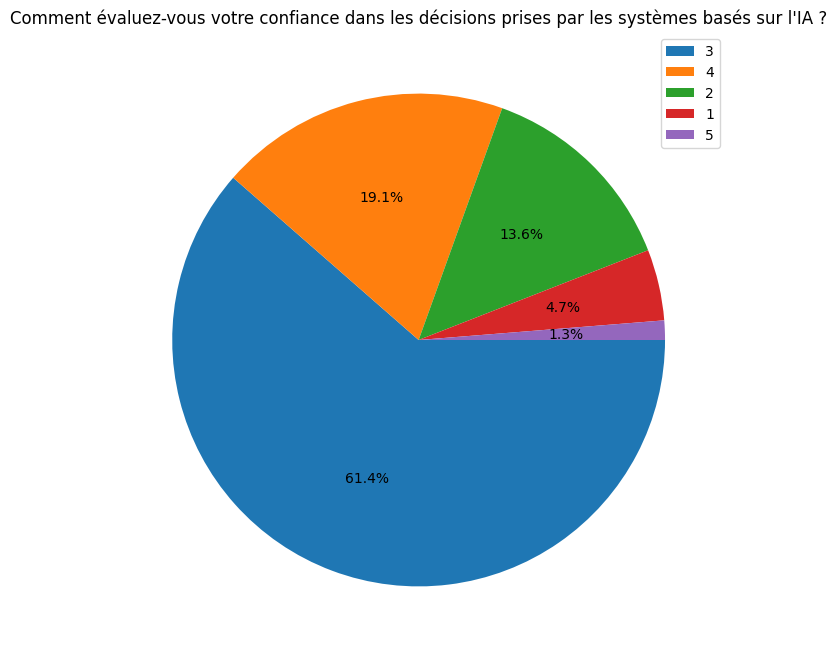

In [114]:
plot_pie('Trust', 'Comment évaluez-vous votre confiance dans les décisions prises par les systèmes basés sur l\'IA ?')

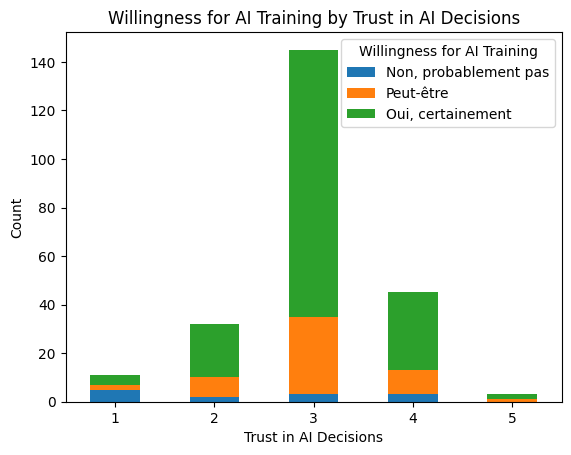

In [115]:
# 12/21 Willingness for AI Training by Trust in AI Decisions
training_trust = df_survey.groupby('Trust')[
  'WillingnessForTraining'
].value_counts().unstack().reindex(columns=[
    'Non, probablement pas',
    'Peut-être',
    'Oui, certainement'
]).plot(kind='bar', stacked=True)
plt.title('Willingness for AI Training by Trust in AI Decisions')
plt.xlabel('Trust in AI Decisions')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Willingness for AI Training')
plt.show()

# ❓ 13. Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?
- [ ] 13/14 Perception de la perte d'autonomie due à l'IA par inquiétudes
- [ ] 13/15 Perception de la réduction des capacités de réflexion due à l'IA par inquiétudes
- [ ] 13/16 Crainte de perdre son emploi à cause de l'IA par inquiétudes
- [ ] 13/17 Autres inquiétudes face à l'arrivée de l'IA par inquiétudes
- [ ] 13/18 Inclusion dans le développement d'outils basés sur l'IA par inquiétudes
- [ ] 13/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par inquiétudes
- [ ] 13/20 Inclination à utiliser l'IA après consultation par inquiétudes
- [ ] 13/21 Disposition à suivre une formation sur les technologies basées sur l'IA par inquiétudes
- [ ] 13/22 Commentaires et suggestions sur l'arrivée de l'IA par inquiétudes

---

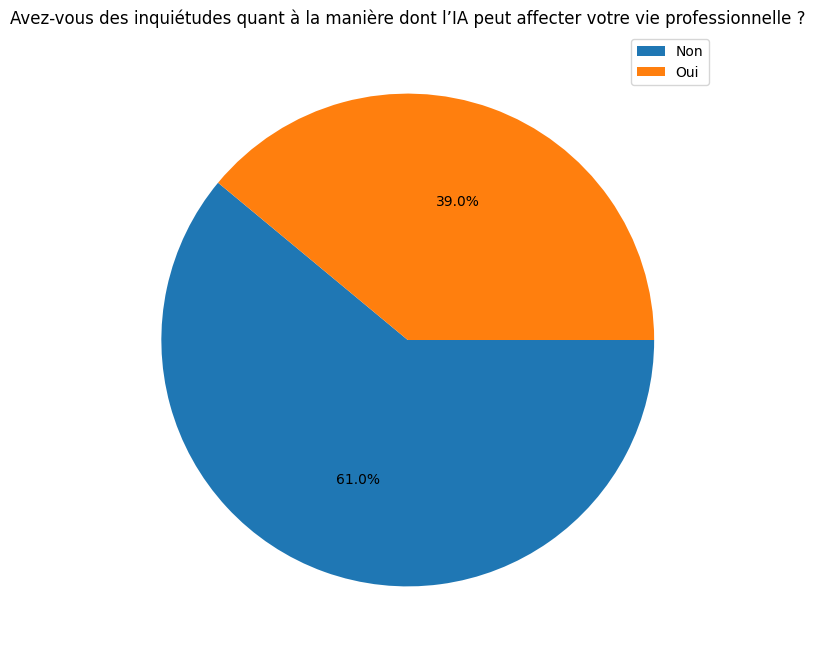

In [116]:
plot_pie('Concerns', 'Avez-vous des inquiétudes quant à la manière dont l’IA peut affecter votre vie professionnelle ?')

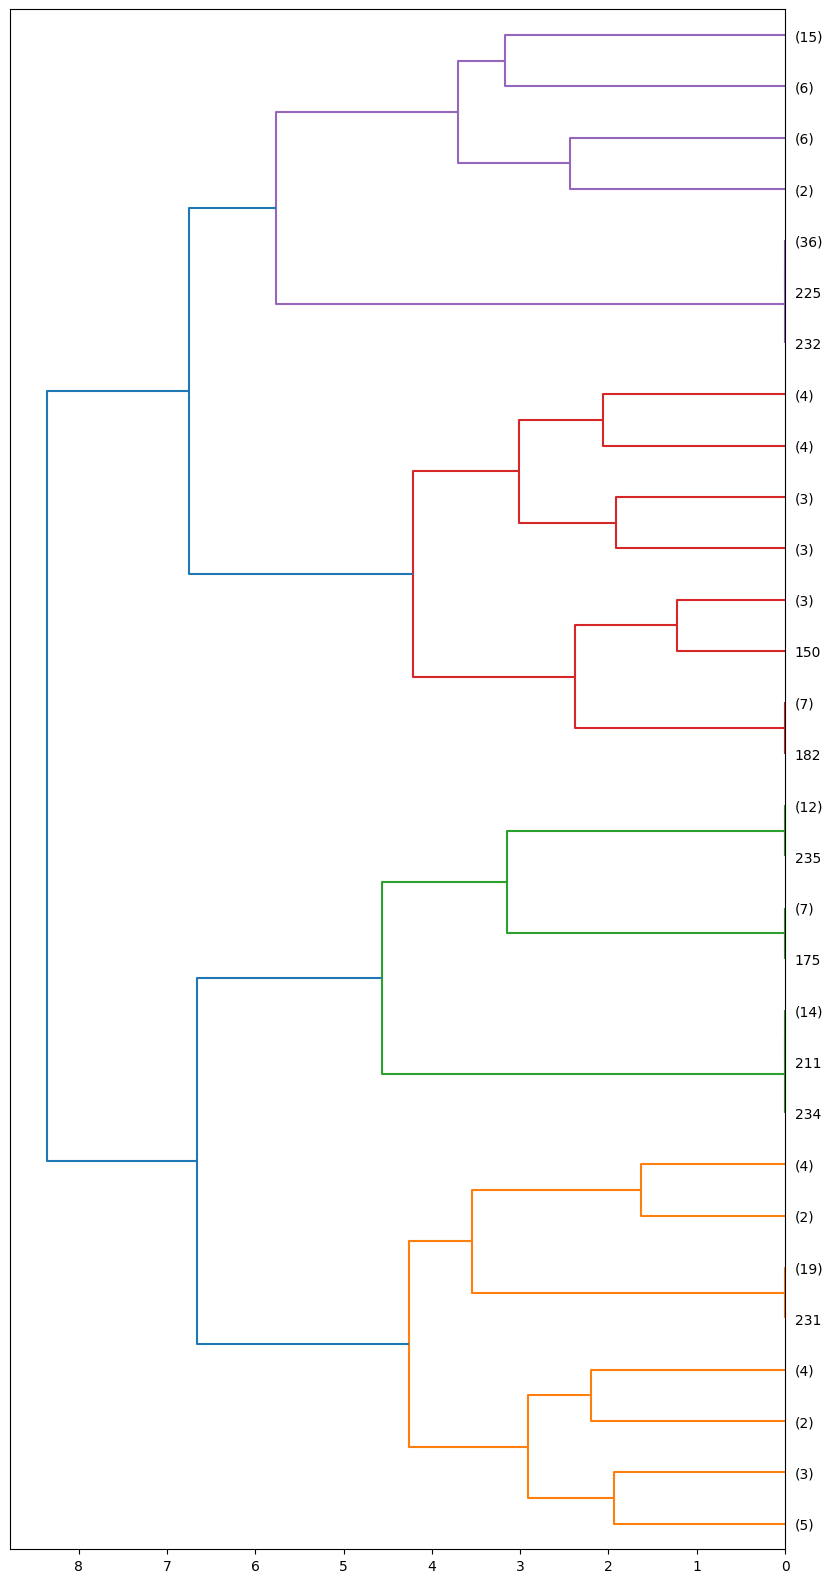

In [117]:
# Convert binary responses to numeric values
binary_columns = [
  "Resistance",
  "Issues",
  "Concerns",
  "FearOfJobLoss",
  "Involved",
  "WantToBeInvolved",
  "ImpactOfBeingInvolved"
]

df_binary_tree = df_survey[df_survey["Issues"] != "Je ne m'en suis jamais servi"]
df_binary_tree = df_binary_tree.dropna(subset=binary_columns)

# Convert binary responses to numeric values
for column in binary_columns:
  df_binary_tree[column] = df_binary_tree[column].map({
    'Oui': 1,
    'Non': 0
  })

# Drop any new NaN values
df_binary_tree = df_binary_tree.dropna(subset=binary_columns)

# Select only the binary columns
df_binary = df_binary_tree[binary_columns]

plt.figure(figsize=(10, 20))

# Calculate the distance between each sample
Z = hierarchy.linkage(df_binary, 'ward')

hierarchy.dendrogram(Z, orientation="left", truncate_mode = 'level', p=4, labels=df_binary.index)
plt.show()

In [118]:
# Resistance > Issues > Concerns > FearOfJobLoss >
# > Involved > want_to_be_consulted_on_ai_development > ImpactOfBeingInvolved
binary_columns = [
  "Resistance",
  "Issues",
  "Concerns",
  "FearOfJobLoss",
  "Involved",
  "WantToBeInvolved",
  "ImpactOfBeingInvolved"
]
df_bin_tree = df_survey[binary_columns]
df_bin_tree = df_bin_tree[df_bin_tree["Issues"] != "Je ne m'en suis jamais servi"]
df_bin_tree = df_bin_tree[df_bin_tree["Involved"] != "Mon entreprise n'utilise pas l’IA"]
df_bin_tree = df_bin_tree.dropna(subset=binary_columns)

# Convert binary responses to numeric values
for column in df_bin_tree.columns:
  df_bin_tree[column] = df_bin_tree[column].map({
    'Oui': 1,
    'Non': 0
  })

df_bin_tree = df_bin_tree.reset_index()  # make sure indexes pair with number of rows

sankey_dict = {}

for index, row in df_bin_tree.iterrows():
  key = ""
  for depth in range(len(binary_columns) - 1):
    key = key + str(row[binary_columns[depth]])
    if key not in sankey_dict:
      sankey_dict[key] = 1
    else:
      sankey_dict[key] += 1

# Create a DataFrame for the Sankey diagram
df_sankey = pd.DataFrame(columns=['source', 'target', 'value'])

sankey_dict_ids = {
  'root': 0
}
for key in sankey_dict.keys():
  sankey_dict_ids[key] = len(sankey_dict_ids)

labels = []

for key, value in sankey_dict.items():
  if len(key) <= 1:
    source = 'root'
  else:
    source = key[:-1]
  df_sankey.loc[len(df_sankey)] = {
      'source': sankey_dict_ids[source],
      'target': sankey_dict_ids[key],
      'value': value
    }
  if len(key) < len(binary_columns) - 1:
    labels.append(binary_columns[len(key)-1] + ' = ' + key[-1].replace('0', 'Non').replace('1', 'Oui'))
  else:
    labels.append('end')


x_positions = [(i + .01) / (len(binary_columns) - 1) for i in range(len(binary_columns))]
y_positions = [i / (len(labels) - 1) for i in range(len(labels))]

fig = go.Figure(data=[go.Sankey(
  node = dict(
    line = dict(color = "black", width = 0.5),
    label = labels,
    x = x_positions,
    y = y_positions,
  ),
  link = dict(
    source = df_sankey['source'],
    target = df_sankey['target'],
    value = df_sankey['value']
  )
)], layout=go.Layout(height=800))

fig.show()

In [119]:

#todo mettre en rapport les questions 13 14 15 16

# ❓ 14. Dans quelle mesure pensez-vous que l'IA pourrait vous faire perdre votre autonomie ?
- [ ] 14/15 Perception de la réduction des capacités de réflexion due à l'IA par perception de la perte d'autonomie
- [ ] 14/16 Crainte de perdre son emploi à cause de l'IA par perception de la perte d'autonomie
- [ ] 14/17 Autres inquiétudes face à l'arrivée de l'IA par perception de la perte d'autonomie
- [ ] 14/18 Inclusion dans le développement d'outils basés sur l'IA par perception de la perte d'autonomie
- [ ] 14/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par perception de la perte d'autonomie
- [ ] 14/20 Inclination à utiliser l'IA après consultation par perception de la perte d'autonomie
- [ ] 14/21 Disposition à suivre une formation sur les technologies basées sur l'IA par perception de la perte d'autonomie
- [ ] 14/22 Commentaires et suggestions sur l'arrivée de l'IA par perception de la perte d'autonomie

---

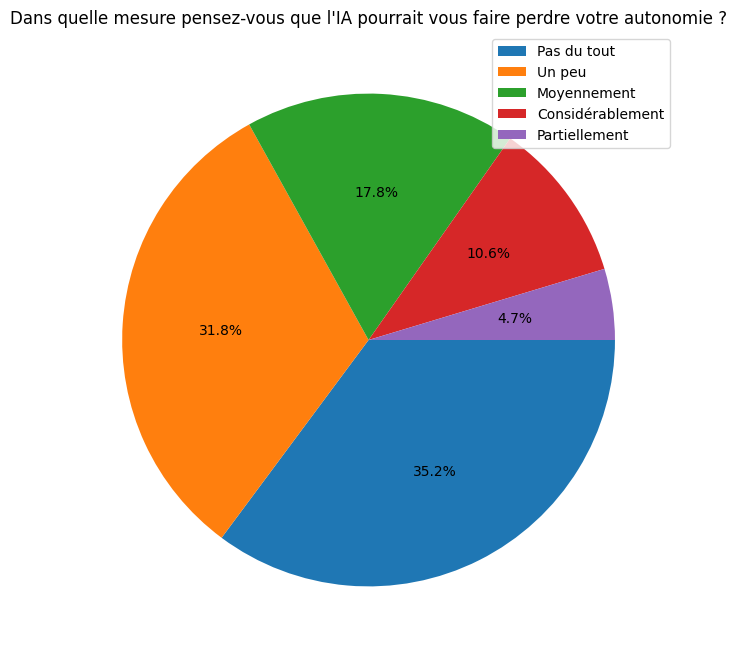

In [120]:
plot_pie('LossOfAutonomy', 'Dans quelle mesure pensez-vous que l\'IA pourrait vous faire perdre votre autonomie ?')

# ❓ 15. Dans quelle mesure pensez-vous que l'IA pourrait réduire vos capacités de réflexions ?
- [ ] 15/16 Crainte de perdre son emploi à cause de l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/17 Autres inquiétudes face à l'arrivée de l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/18 Inclusion dans le développement d'outils basés sur l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/20 Inclination à utiliser l'IA après consultation par perception de la réduction des capacités de réflexion
- [ ] 15/21 Disposition à suivre une formation sur les technologies basées sur l'IA par perception de la réduction des capacités de réflexion
- [ ] 15/22 Commentaires et suggestions sur l'arrivée de l'IA par perception de la réduction des capacités de réflexion

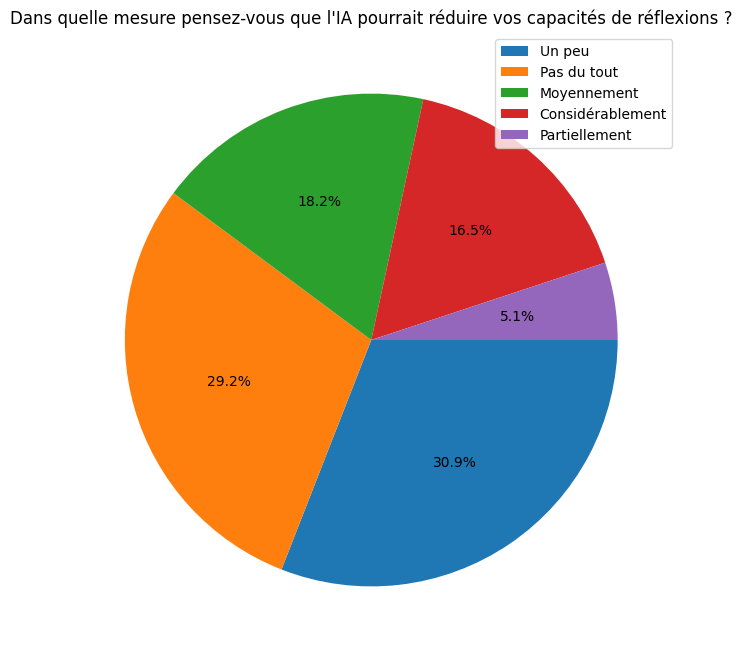

In [121]:
plot_pie('ReducedThinking', 'Dans quelle mesure pensez-vous que l\'IA pourrait réduire vos capacités de réflexions ?')

# ❓ 16. Craignez-vous que l'IA ne vous fasse perdre votre emploi ?
- [ ] 16/17 Autres inquiétudes face à l'arrivée de l'IA par crainte de perdre son emploi
- [ ] 16/18 Inclusion dans le développement d'outils basés sur l'IA par crainte de perdre son emploi
- [ ] 16/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par crainte de perdre son emploi
- [ ] 16/20 Inclination à utiliser l'IA après consultation par crainte de perdre son emploi
- [ ] 16/21 Disposition à suivre une formation sur les technologies basées sur l'IA par crainte de perdre son emploi
- [ ] 16/22 Commentaires et suggestions sur l'arrivée de l'IA par crainte de perdre son emploi

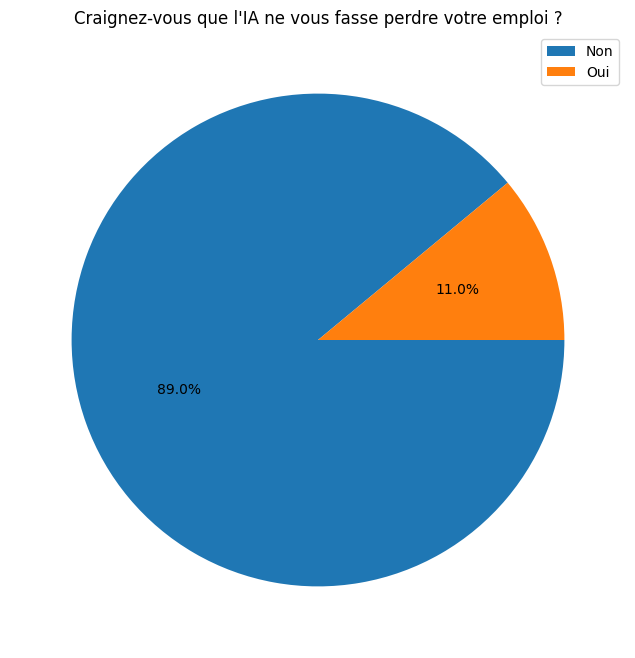

L'IA est encore trop bête pour ça, et je pense que j'ai le temps avant qu'elle devienne suffisamment intelligente pour me voler mon travail.
Métier de contrôle indispensable
L'utilisation de l'IA requiert un utilisateur disposant d'esprit critique et de culture de son métier pour valider la donnée obtenue par IA
L'IA doit être une aide mais la décision et le regard critique reste à ma main
Les taches à plus forte valeur ajoutée resteront à la main des humains
Mon domaine dactivite necessite du travail de terrain que l'IA ne peut pas effectuer et de lanalyse juridique. Tout les aspects de calculs et de dessins arctecturaux pourraient etre affecté, mais pas toute la profession pour autant.
xx
pas de crainte dans le métier de commercial B to C car il faut un contact humain qui peut aider à la prise de décision.
L'IA serait un atout pour augmenter en compétence.
Il y aura toujours besoin de relations humaines dans le cadre de mon métier
C'est un outil et seulement un outil.
La conduite de 

In [122]:
plot_pie('FearOfJobLoss', 'Craignez-vous que l\'IA ne vous fasse perdre votre emploi ?')

for response in df_survey['FearOfJobLossDetails'].dropna():
  print(response)

# ❓ 17. Avez-vous d’autres inquiétudes vis-à-vis de votre travail face à l’arrivée de l’IA ?
- [ ] 17/18 Inclusion dans le développement d'outils basés sur l'IA par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/20 Inclination à utiliser l'IA après consultation par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/21 Disposition à suivre une formation sur les technologies basées sur l'IA par autres inquiétudes face à l'arrivée de l'IA
- [ ] 17/22 Commentaires et suggestions sur l'arrivée de l'IA par autres inquiétudes face à l'arrivée de l'IA

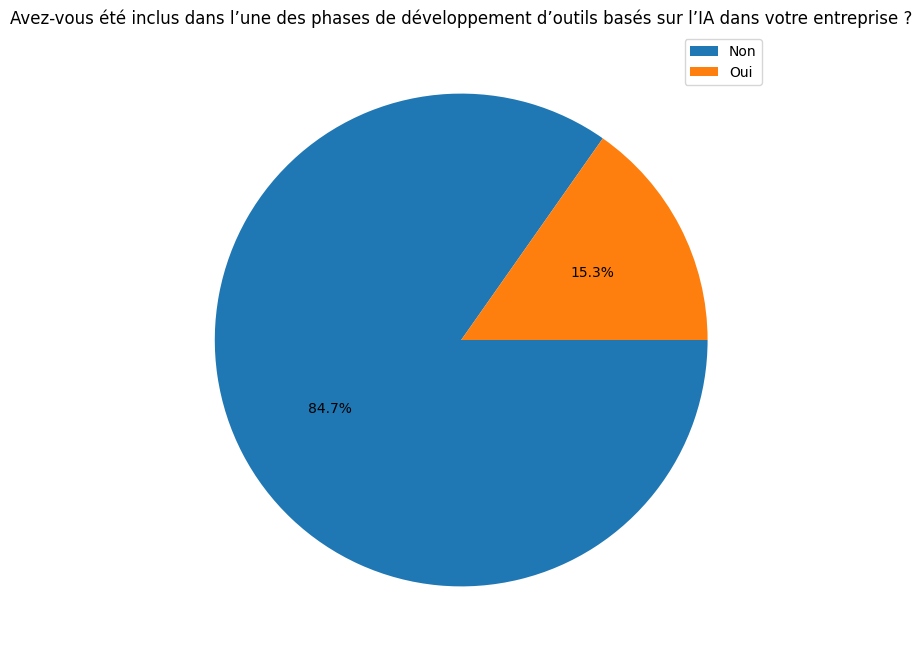

Les services externes d'IA sont une très grosse brèche de sécurité : je ne peux pas demander à ChatGPT d'écrire du code pour moi sans briser les clauses de non-divulgation de mon contrat. Au niveau de la génération d'images, on a également des risques au niveau des droits d'auteur, qui est encore quelque chose d'assez flou.
Ne pas savoir suffisamment bien l'utiliser au quotidien et perdre en productivité par rapport à d'autres qui auraient été mieux formés
Le fonctionnement de l’IA doit être transparent pour les utilisateurs et les algorithmes ouverts à tous afin de contrôler d’éventuels dysfonctionnements
l'accompagnement de l'entreprise et des collaborateurs : tous les embarquer
Un paresse d'esprit, vol de données, perte de la dimension humaine et affective,....
Grosse perte en compétence, du savoir-faire et manque d'humanité dans le travail (je ne suis pas travaillé avec une IA comme collègue). Cela doit rester un outil.
Non plus sur le domaine personnel (santé, organisme financier,

In [123]:
plot_pie('OtherConcerns', 'Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?')

for response in df_survey['OtherConcernsDetails'].dropna():
  print(response)

# ❓ 18. Avez-vous été inclus dans l’une des phases de développement d’outils basés sur l’IA dans votre entreprise ?
- [ ] 18/19 Désir de consultation pour l'élaboration d'outils basés sur l'IA par inclusion dans le développement d'outils basés sur l'IA
- [ ] 18/20 Inclination à utiliser l'IA après consultation par inclusion dans le développement d'outils basés sur l'IA
- [ ] 18/21 Disposition à suivre une formation sur les technologies basées sur l'IA par inclusion dans le développement d'outils basés sur l'IA
- [ ] 18/22 Commentaires et suggestions sur l'arrivée de l'IA par inclusion dans le développement d'outils basés sur l'IA

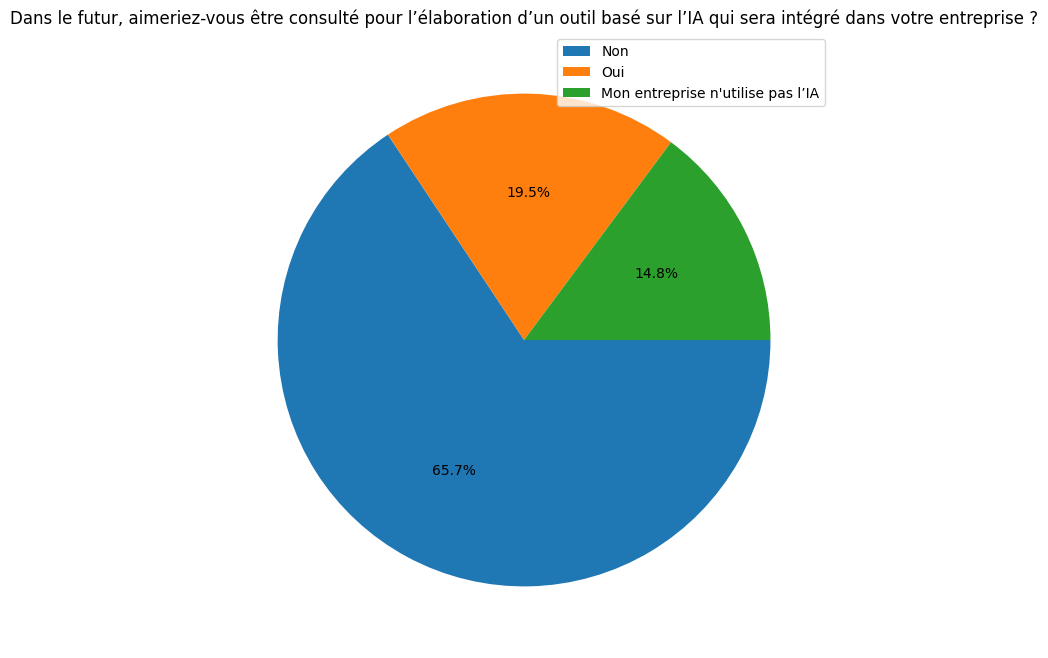

In [124]:
plot_pie('Involved', 'Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?')

# ❓ 19. Dans le futur, aimeriez-vous être consulté pour l’élaboration d’un outil basé sur l’IA qui sera intégré dans votre entreprise ?
- [ ] 19/20 Inclination à utiliser l'IA après consultation par désir de consultation pour l'élaboration d'outils basés sur l'IA
- [ ] 19/21 Disposition à suivre une formation sur les technologies basées sur l'IA par désir de consultation pour l'élaboration d'outils basés sur l'IA
- [ ] 19/22 Commentaires et suggestions sur l'arrivée de l'IA par désir de consultation pour l'élaboration d'outils basés sur l'IA

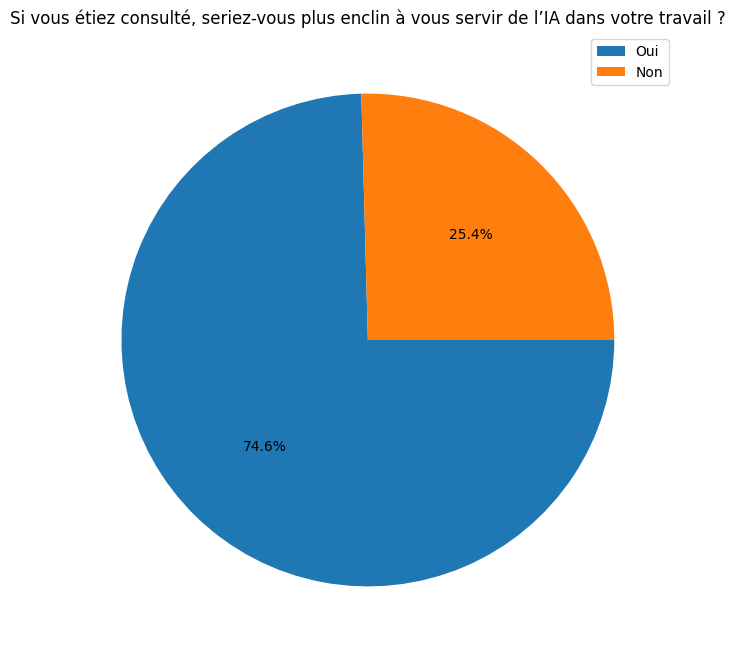

In [125]:
plot_pie('WantToBeInvolved', 'Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?')

# ❓ 20. Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?
- [ ] 20/21 Disposition à suivre une formation sur les technologies basées sur l'IA par inclination à utiliser l'IA après consultation
- [ ] 20/22 Commentaires et suggestions sur l'arrivée de l'IA par inclination à utiliser l'IA après consultation

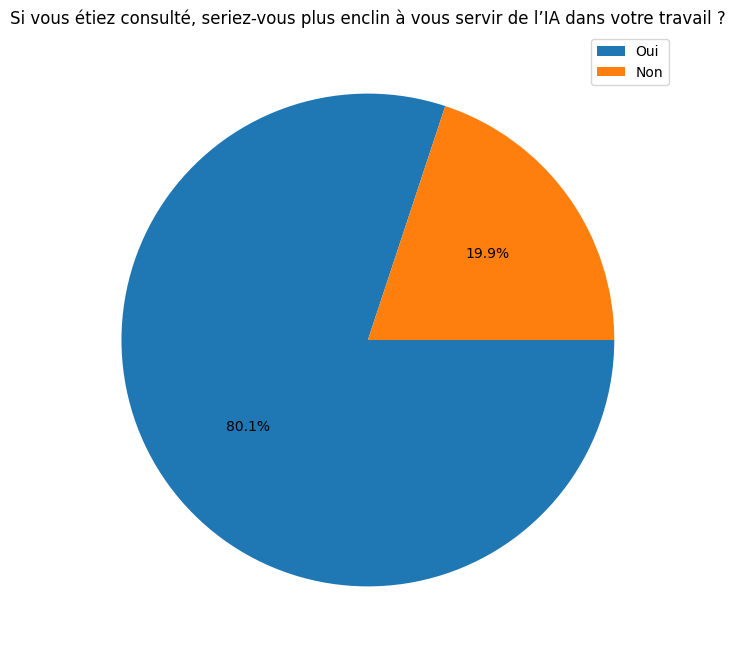

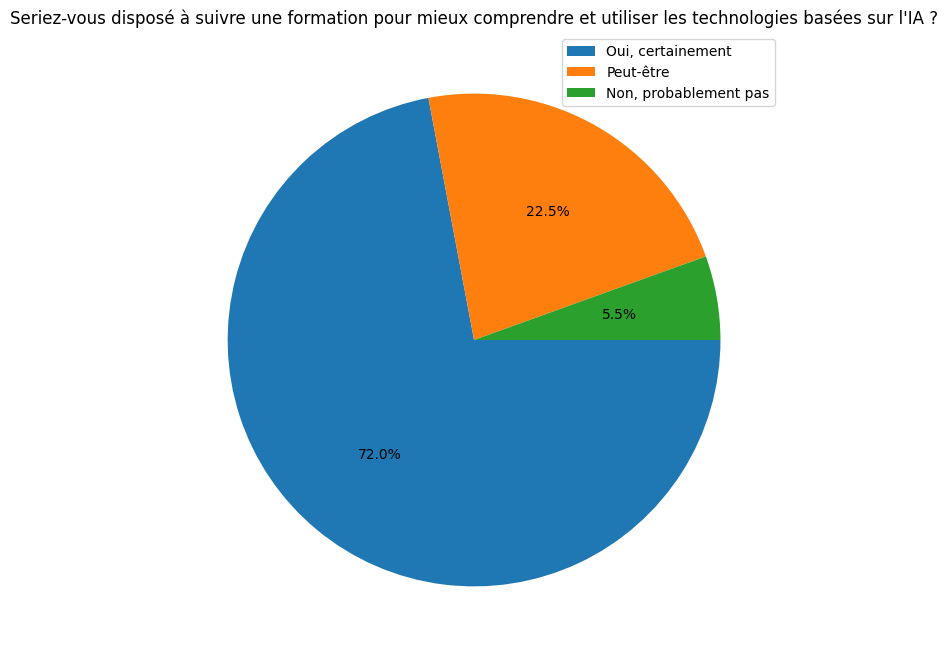

In [126]:
plot_pie('ImpactOfBeingInvolved', 'Si vous étiez consulté, seriez-vous plus enclin à vous servir de l’IA dans votre travail ?')

plot_pie('WillingnessForTraining', 'Seriez-vous disposé à suivre une formation pour mieux comprendre et utiliser les technologies basées sur l\'IA ?')
